# Time Series Forecasting - ABC Estate Wines Project - Coded

**Context**

As an analyst at ABC Estate Wines, we are presented with historical data encompassing the sales of different types of wines throughout the 20th century. These datasets originate from the same company but represent sales figures for distinct wine varieties. Our objective is to delve into the data, analyze trends, patterns, and factors influencing wine sales over the course of the century. By leveraging data analytics and forecasting techniques, we aim to gain actionable insights that can inform strategic decision-making and optimize sales strategies for the future.

**Objective**

The primary objective of this project is to analyze and forecast wine sales trends for the 20th century based on historical data provided by ABC Estate Wines. We aim to equip ABC Estate Wines with the necessary insights and foresight to enhance sales performance, capitalize on emerging market opportunities, and maintain a competitive edge in the wine industry.

**Problem definition**

The problem is to:
1.	Identify patterns and trends in the historical wine sales data.
2.	Analyze key factors that have influenced sales over time.
3.	Develop accurate forecasting models to predict future sales trends.
Addressing these problems will enable ABC Estate Wines to make data-driven decisions, optimize sales strategies, and stay competitive in the evolving wine industry.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.tools.eval_measures as em
from sklearn.metrics import  mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from IPython.display import display
from pylab import rcParams
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Define the Problem and Perform Exploratory Data Analysis

## Read the data as an appropriate time series data

In [2]:
# Read the data
rose_data = pd.read_csv("Rose.csv")
rose_data.head()
rose_data.tail()
rose_data.shape

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

(187, 2)

In [3]:
# Read the data
sparkling_data = pd.read_csv("Sparkling.csv")
sparkling_data.head()
sparkling_data.tail()
sparkling_data.shape

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

(187, 2)

In [4]:
rose_data.info()
sparkling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


The dataset has two columns:
- YearMonth: This appears to represent dates in a string format (e.g., "1980-01").
- Rose: This contains sales data, but there are two missing values.

In [5]:
# Convert 'YearMonth' to datetime format for proper alignment
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'], format='%Y-%m')
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'], format='%Y-%m')

# Set 'YearMonth' as the index for both datasets for alignment
rose_data.set_index('YearMonth', inplace=True)
sparkling_data.set_index('YearMonth', inplace=True)

# Verify the changes
print("Rose Data:")
print(rose_data.head())  # Displaying first few rows to check the changes
print("\nSparkling Data:")
print(sparkling_data.head())  # Displaying first few rows to check the changes

Rose Data:
             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Sparkling Data:
            Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471


## Plot the data

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Rose Wine Time Series')

([<matplotlib.axis.XTick at 0x1e27dc2edd0>,
 [Text(3652.0, 0, '1980-01-01'),
  Text(3834.0, 0, '1980-07-01'),
  Text(4018.0, 0, '1981-01-01'),
  Text(4199.0, 0, '1981-07-01'),
  Text(4383.0, 0, '1982-01-01'),
  Text(4564.0, 0, '1982-07-01'),
  Text(4748.0, 0, '1983-01-01'),
  Text(4929.0, 0, '1983-07-01'),
  Text(5113.0, 0, '1984-01-01'),
  Text(5295.0, 0, '1984-07-01'),
  Text(5479.0, 0, '1985-01-01'),
  Text(5660.0, 0, '1985-07-01'),
  Text(5844.0, 0, '1986-01-01'),
  Text(6025.0, 0, '1986-07-01'),
  Text(6209.0, 0, '1987-01-01'),
  Text(6390.0, 0, '1987-07-01'),
  Text(6574.0, 0, '1988-01-01'),
  Text(6756.0, 0, '1988-07-01'),
  Text(6940.0, 0, '1989-01-01'),
  Text(7121.0, 0, '1989-07-01'),
  Text(7305.0, 0, '1990-01-01'),
  Text(7486.0, 0, '1990-07-01'),
  Text(7670.0, 0, '1991-01-01'),
  Text(7851.0, 0, '1991-07-01'),
  Text(8035.0, 0, '1992-01-01'),
  Text(8217.0, 0, '1992-07-01'),
  Text(8401.0, 0, '1993-01-01'),
  Text(8582.0, 0, '1993-07-01'),
  Text(8766.0, 0, '1994-01-01'),

Text(0.5, 0, 'YearMonth')

Text(0, 0.5, 'Sales')

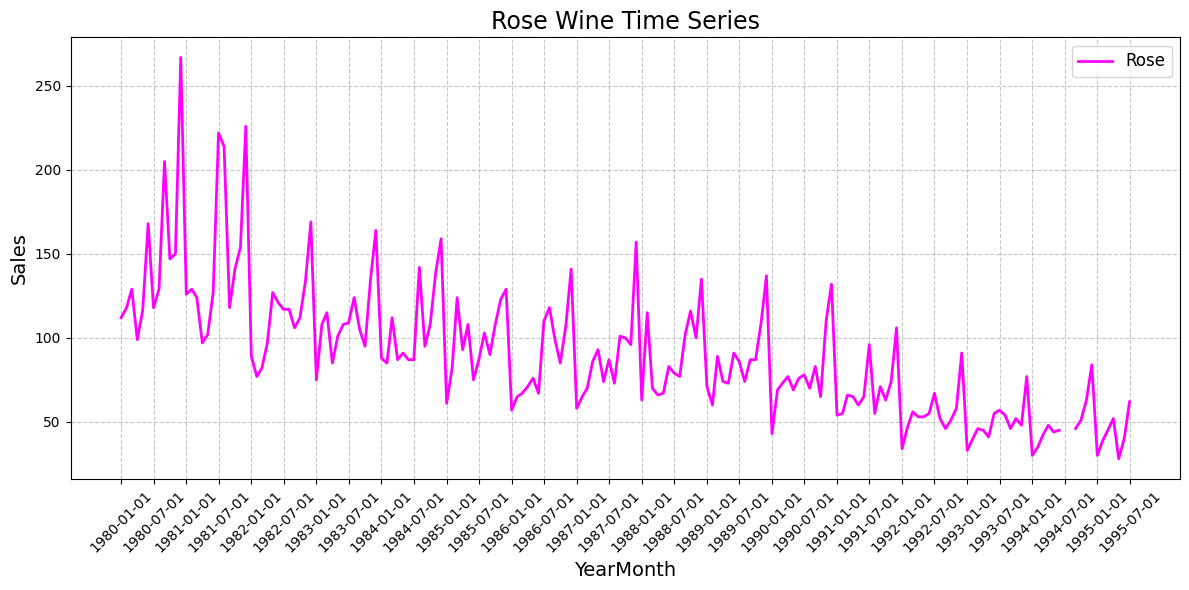

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Sparkling Wine Time Series')

([<matplotlib.axis.XTick at 0x1e27f4aa410>,
 [Text(3652.0, 0, '1980-01-01'),
  Text(3834.0, 0, '1980-07-01'),
  Text(4018.0, 0, '1981-01-01'),
  Text(4199.0, 0, '1981-07-01'),
  Text(4383.0, 0, '1982-01-01'),
  Text(4564.0, 0, '1982-07-01'),
  Text(4748.0, 0, '1983-01-01'),
  Text(4929.0, 0, '1983-07-01'),
  Text(5113.0, 0, '1984-01-01'),
  Text(5295.0, 0, '1984-07-01'),
  Text(5479.0, 0, '1985-01-01'),
  Text(5660.0, 0, '1985-07-01'),
  Text(5844.0, 0, '1986-01-01'),
  Text(6025.0, 0, '1986-07-01'),
  Text(6209.0, 0, '1987-01-01'),
  Text(6390.0, 0, '1987-07-01'),
  Text(6574.0, 0, '1988-01-01'),
  Text(6756.0, 0, '1988-07-01'),
  Text(6940.0, 0, '1989-01-01'),
  Text(7121.0, 0, '1989-07-01'),
  Text(7305.0, 0, '1990-01-01'),
  Text(7486.0, 0, '1990-07-01'),
  Text(7670.0, 0, '1991-01-01'),
  Text(7851.0, 0, '1991-07-01'),
  Text(8035.0, 0, '1992-01-01'),
  Text(8217.0, 0, '1992-07-01'),
  Text(8401.0, 0, '1993-01-01'),
  Text(8582.0, 0, '1993-07-01'),
  Text(8766.0, 0, '1994-01-01'),

Text(0.5, 0, 'YearMonth')

Text(0, 0.5, 'Sales')

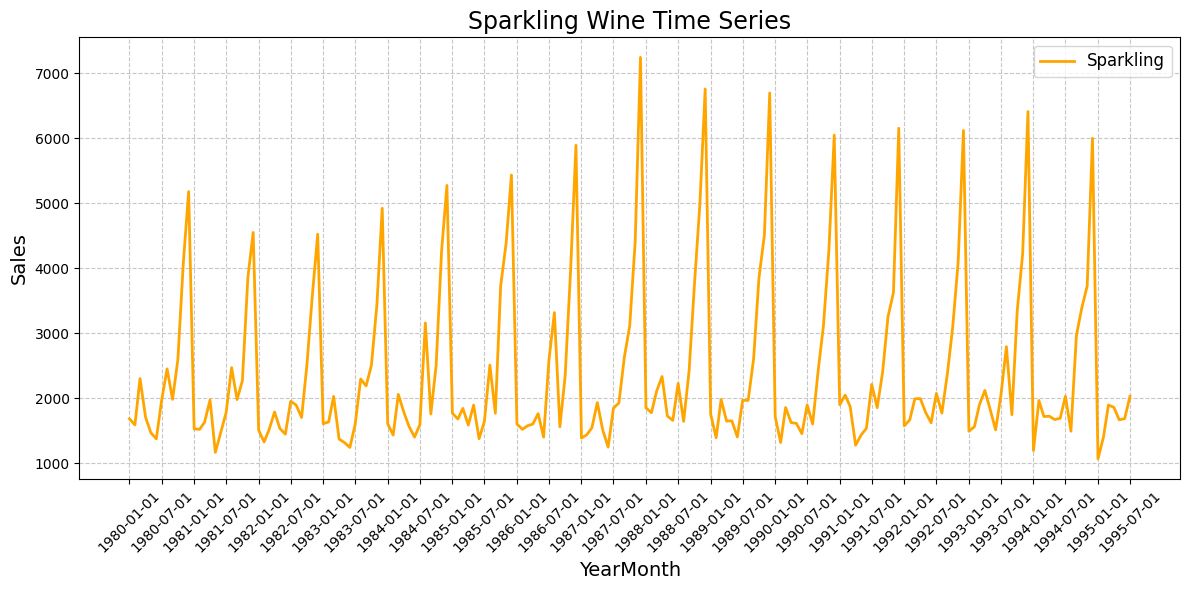

In [6]:
# Plotting Rose time series
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(rose_data.index, rose_data['Rose'], color='magenta', linewidth=2)  # Changed color to 'magenta'
plt.title('Rose Wine Time Series', fontsize=17)
plt.xticks(rose_data.index[::6], rotation=45)  # Show every 6th label and rotate by 45 degrees
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(['Rose'], loc='best', fontsize=12)
plt.tight_layout()
plt.show()

# Plotting Sparkling time series
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], color='orange', linewidth=2)  # Use index for X-axis
plt.title('Sparkling Wine Time Series', fontsize=17)
plt.xticks(sparkling_data.index[::6], rotation=45)  # Show every 6th label and rotate by 45 degrees
plt.xlabel('YearMonth', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(['Sparkling'], loc='best', fontsize=12)
plt.tight_layout()
plt.show()

## Perform EDA

In [7]:
# Summary statistics for Rose dataset
rose_summary = rose_data.describe()
print("Summary statistics for Rose dataset:\n", rose_summary)

# Summary statistics for Sparkling dataset
sparkling_summary = sparkling_data.describe()
print("\nSummary statistics for Sparkling dataset:\n", sparkling_summary)

Summary statistics for Rose dataset:
              Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Summary statistics for Sparkling dataset:
          Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


In [8]:
# Check for missing values
print("\nMissing Values in Rose Data:")
print(rose_data.isnull().sum())
print("\nMissing Values in Sparkling Data:")
print(sparkling_data.isnull().sum())


Missing Values in Rose Data:
Rose    2
dtype: int64

Missing Values in Sparkling Data:
Sparkling    0
dtype: int64


In [9]:
# Descriptive statistics
print("\nDescriptive Statistics for Rose Sales:")
print(rose_data.describe())
print("\nDescriptive Statistics for Sparkling Sales:")
print(sparkling_data.describe())


Descriptive Statistics for Rose Sales:
             Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

Descriptive Statistics for Sparkling Sales:
         Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Rose', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Rose Sales')

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Frequency')

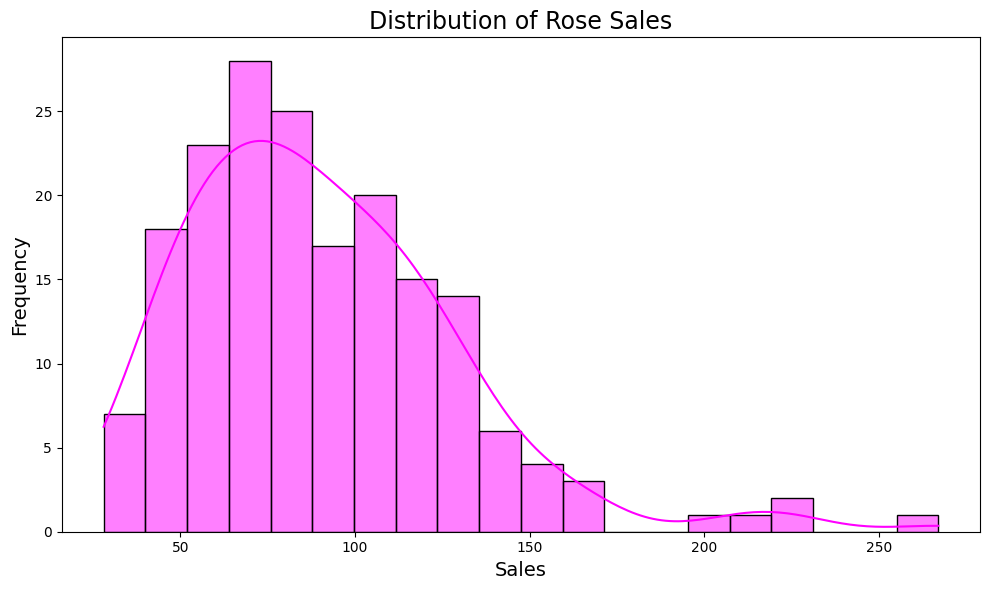

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Sparkling', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Sparkling Sales')

Text(0.5, 0, 'Sales')

Text(0, 0.5, 'Frequency')

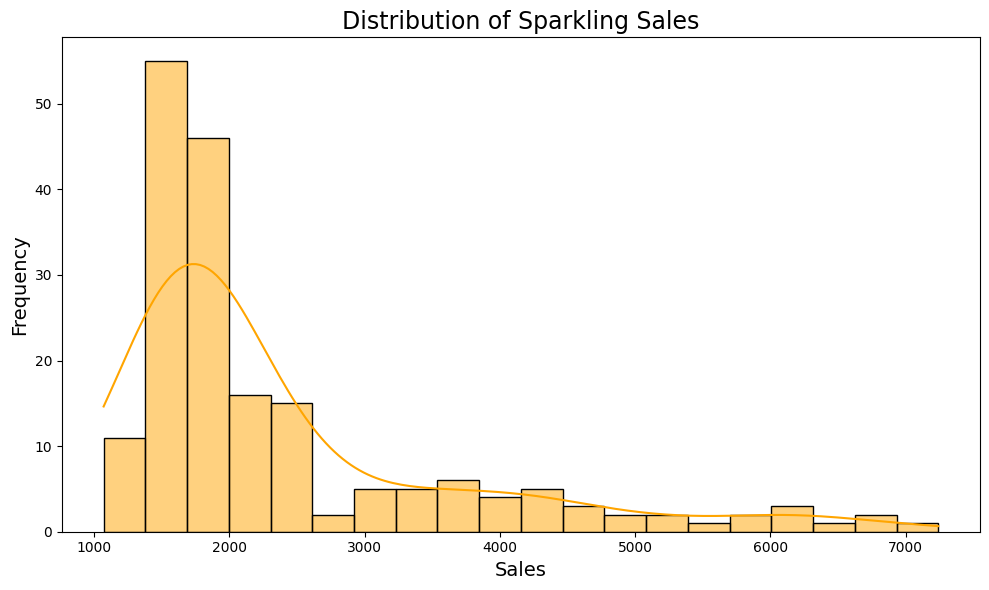

In [10]:
# Rose Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(rose_data['Rose'], kde=True, color='magenta', bins=20)
plt.title('Distribution of Rose Sales', fontsize=17)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# Sparkling Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sparkling_data['Sparkling'], kde=True, color='orange', bins=20)
plt.title('Distribution of Sparkling Sales', fontsize=17)
plt.xlabel('Sales', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

C:\Users\agnes\AppData\Local\Temp\ipykernel_11360\2977459703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rose_data.index.month, y=rose_data['Rose'], palette='Set2')


<Axes: xlabel='YearMonth', ylabel='Rose'>

Text(0.5, 1.0, 'Monthly Boxplot of Rose Sales')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

([<matplotlib.axis.XTick at 0x1e27f0a5550>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

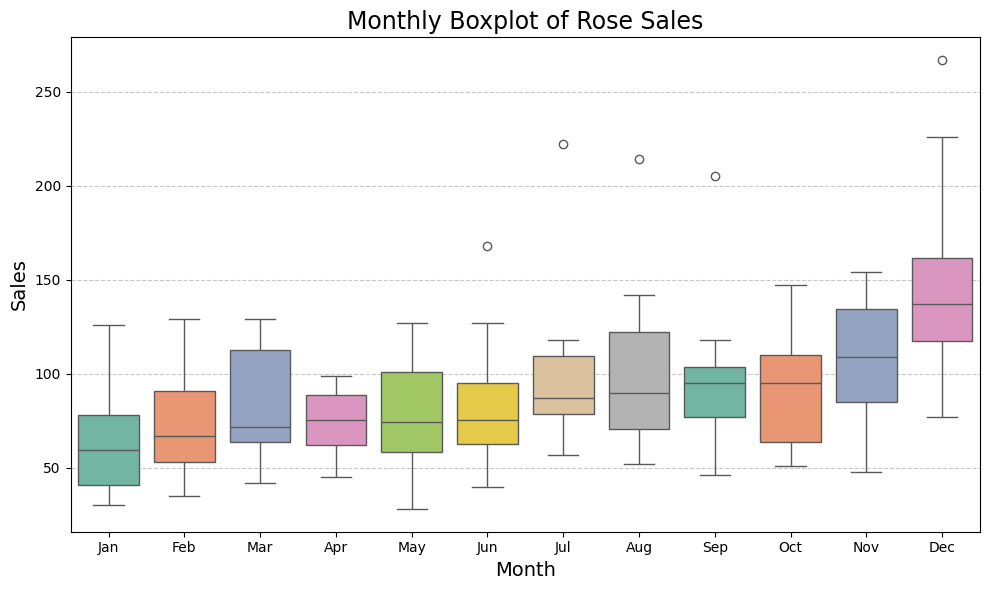

<Figure size 1000x600 with 0 Axes>

C:\Users\agnes\AppData\Local\Temp\ipykernel_11360\2977459703.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sparkling_data.index.month, y=sparkling_data['Sparkling'], palette='Set1')


<Axes: xlabel='YearMonth', ylabel='Sparkling'>

Text(0.5, 1.0, 'Monthly Boxplot of Sparkling Sales')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Sales')

([<matplotlib.axis.XTick at 0x1e202136b90>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

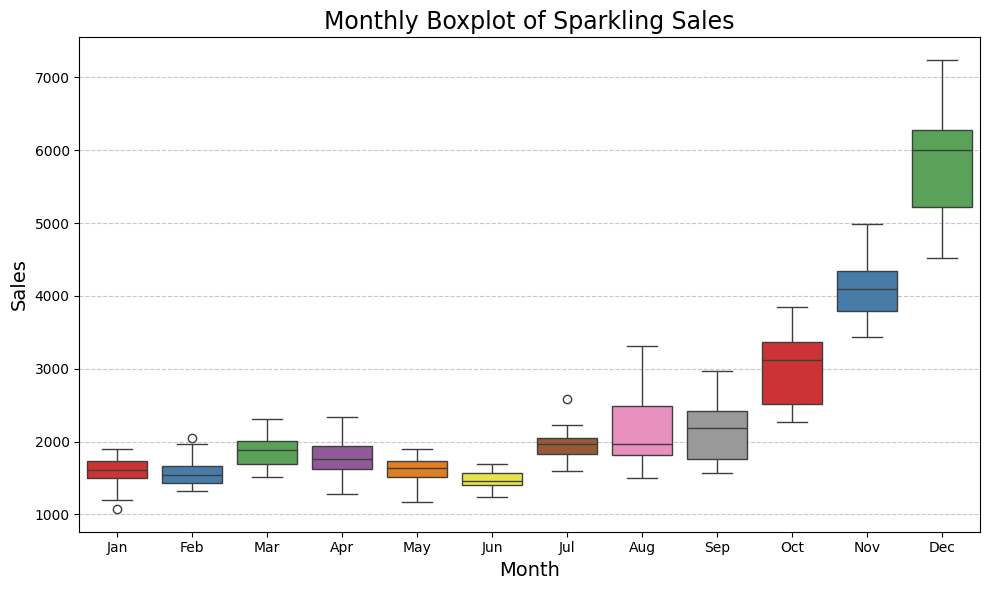

In [11]:
# Monthly Boxplot for Rose
plt.figure(figsize=(10, 6))
sns.boxplot(x=rose_data.index.month, y=rose_data['Rose'], palette='Set2')
plt.title('Monthly Boxplot of Rose Sales', fontsize=17)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Monthly Boxplot for Sparkling
plt.figure(figsize=(10, 6))
sns.boxplot(x=sparkling_data.index.month, y=sparkling_data['Sparkling'], palette='Set1')
plt.title('Monthly Boxplot of Sparkling Sales', fontsize=17)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [12]:
# Correlation analysis between Rose and Sparkling sales
correlation = rose_data['Rose'].corr(sparkling_data['Sparkling'])
print("Correlation between Rose and Sparkling sales:", correlation)

Correlation between Rose and Sparkling sales: 0.40457904770543324


## Perform Decomposition

To perform the decomposition of Rose wine sales, it is essential to treat the missing values in the Rose dataset first. Decomposition functions cannot handle missing values, so addressing these gaps is crucial for obtaining accurate and reliable results from the decomposition process.

# Data Pre-processing

## Missing value treatment

In [13]:
# Fill missing values in Rose dataset using forward filling
rose_data['Rose'].fillna(method='ffill', inplace=True)

# Check for missing values in Rose dataset after forward filling
rose_missing_values_after_fill = rose_data.isnull().sum()
print("Missing values in Rose dataset after forward filling:\n", rose_missing_values_after_fill)

Missing values in Rose dataset after forward filling:
 Rose    0
dtype: int64


In [14]:
# Check for missing values in Rose dataset
rose_missing_values_final = rose_data.isnull().sum()
print("Missing values in Rose dataset:\n", rose_missing_values_final)

# Check for missing values in Sparkling dataset
sparkling_missing_values_final = sparkling_data.isnull().sum()
print("\nMissing values in Sparkling dataset:\n", sparkling_missing_values_final)

Missing values in Rose dataset:
 Rose    0
dtype: int64

Missing values in Sparkling dataset:
 Sparkling    0
dtype: int64


Now will do decomposition for rose wine sales

## Decompose the Time Series and plot the different components.

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition - Rose 

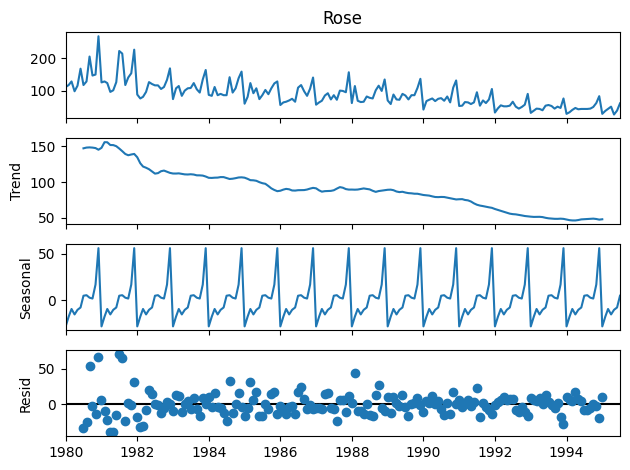

In [16]:
decomposition_Add = seasonal_decompose(rose_data['Rose'],model='additive')
decomposition_Add.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [17]:
trend = decomposition_Add.trend
seasonality = decomposition_Add.seasonal
residual = decomposition_Add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -27.903092
1980-02-01   -17.431663
1980-03-01    -9.279878
1980-04-01   -15.092378
1980-05-01   -10.190592
1980-06-01    -7.672735
1980-07-01     4.880241
1980-08-01     5.460797
1980-09-01     2.780241
1980-10-01     1.877464
1980-11-01    16.852464
1980-12-01    55.719130
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -33.963575
1980-08-01   -24.585797
1980-09-01    53.844759
1980-10-01    -2.960797
1980-11-01   -14.269130
1980-12-01    66.15587

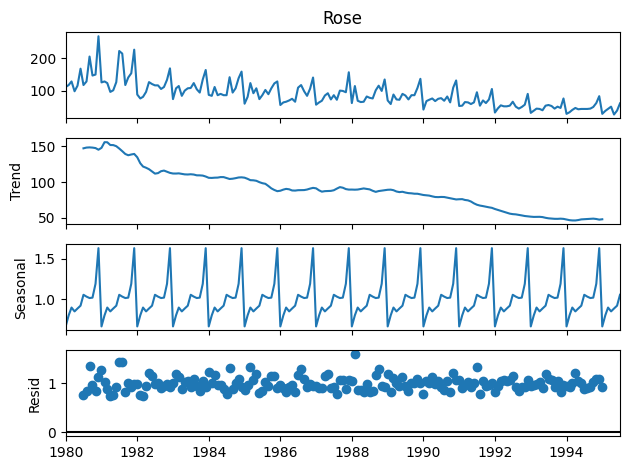

In [18]:
decomposition_MUL = seasonal_decompose(rose_data['Rose'],model='multiplicative')
decomposition_MUL.plot();

In [19]:
trend = decomposition_MUL.trend
seasonality = decomposition_MUL.seasonal
residual = decomposition_MUL.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.670182
1980-02-01    0.806224
1980-03-01    0.901278
1980-04-01    0.854154
1980-05-01    0.889531
1980-06-01    0.924099
1980-07-01    1.057682
1980-08-01    1.035066
1980-09-01    1.017753
1980-10-01    1.022688
1980-11-01    1.192494
1980-12-01    1.628848
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.758514
1980-08-01    0.841382
1980-09-01    1.357534
1980-10-01    0.970661
1980-11-01    0.853274
1980-12-01    1.129506
Name: resid, dtype: fl

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Decomposition - Sparkling

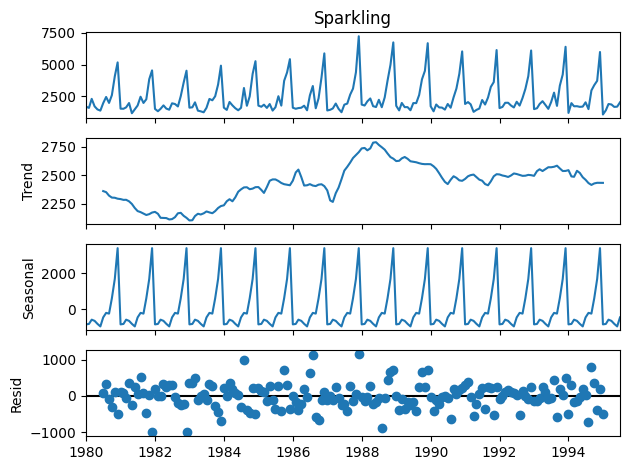

In [21]:
decomposition_Add = seasonal_decompose(sparkling_data['Sparkling'],model='additive')
decomposition_Add.plot();

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [22]:
trend = decomposition_Add.trend
seasonality = decomposition_Add.seasonal
residual = decomposition_Add.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


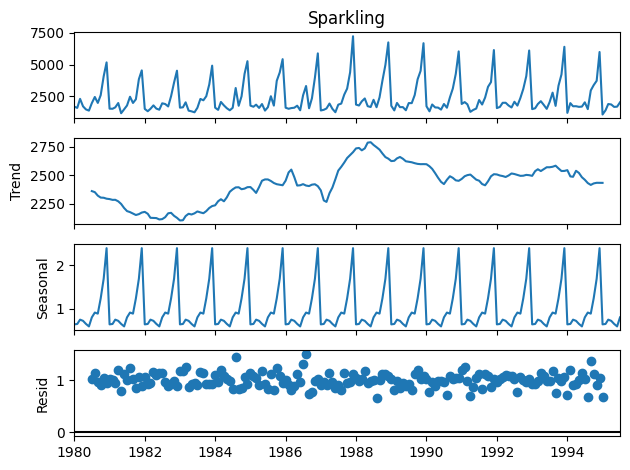

In [23]:
decomposition_MUL = seasonal_decompose(sparkling_data['Sparkling'],model='multiplicative')
decomposition_MUL.plot();

- **For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series **
- **Also it is evident that there is a 6 month seasonality in the data from the above plots **

In [24]:
trend = decomposition_MUL.trend
seasonality = decomposition_MUL.seasonal
residual = decomposition_MUL.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

## Visualize the processed data

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Rose Wine Sales Over Time')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([2922., 3652., 4383., 5113., 5844., 6574., 7305., 8035., 8766.,
        9496.]),
 [Text(2922.0, 0, '1978'),
  Text(3652.0, 0, '1980'),
  Text(4383.0, 0, '1982'),
  Text(5113.0, 0, '1984'),
  Text(5844.0, 0, '1986'),
  Text(6574.0, 0, '1988'),
  Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996')])

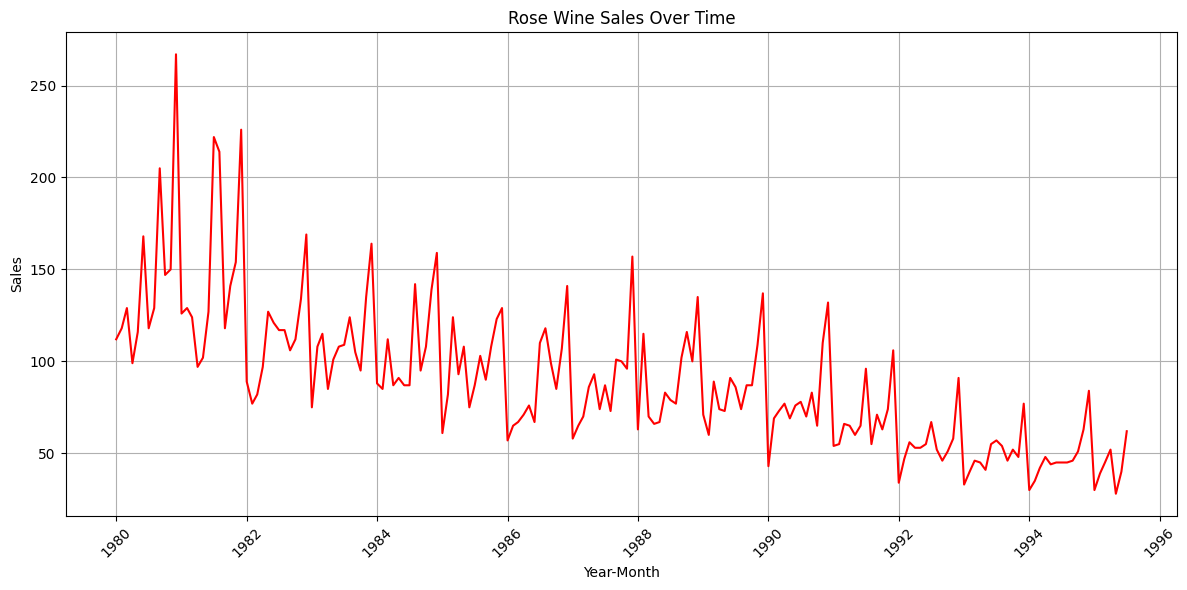

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Sparkling Wine Sales Over Time')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([2922., 3652., 4383., 5113., 5844., 6574., 7305., 8035., 8766.,
        9496.]),
 [Text(2922.0, 0, '1978'),
  Text(3652.0, 0, '1980'),
  Text(4383.0, 0, '1982'),
  Text(5113.0, 0, '1984'),
  Text(5844.0, 0, '1986'),
  Text(6574.0, 0, '1988'),
  Text(7305.0, 0, '1990'),
  Text(8035.0, 0, '1992'),
  Text(8766.0, 0, '1994'),
  Text(9496.0, 0, '1996')])

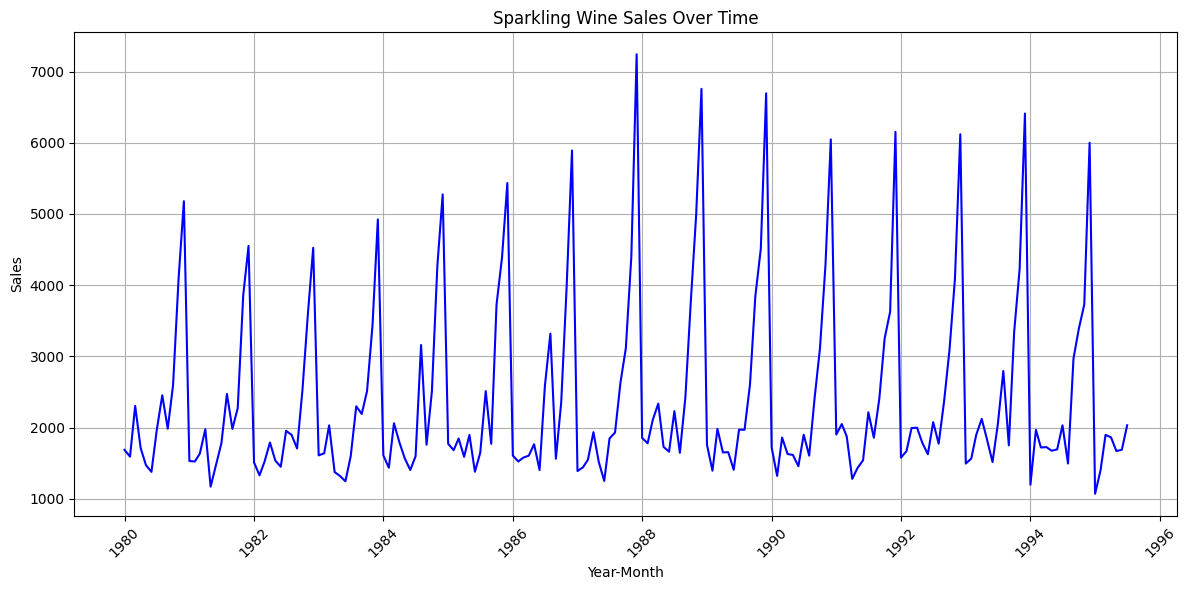

In [25]:
# Plotting Rose dataset
plt.figure(figsize=(12, 6))
plt.plot(rose_data.index, rose_data['Rose'], color='red')
plt.title('Rose Wine Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Sparkling dataset
plt.figure(figsize=(12, 6))
plt.plot(sparkling_data.index, sparkling_data['Sparkling'], color='blue')
plt.title('Sparkling Wine Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split

# Reset index to have 'YearMonth' as a column
rose_data.reset_index(inplace=True)
sparkling_data.reset_index(inplace=True)

# Train-test split for Rose dataset
rose_train, rose_test = train_test_split(rose_data, test_size=0.2, shuffle=False)

# Train-test split for Sparkling dataset
sparkling_train, sparkling_test = train_test_split(sparkling_data, test_size=0.2, shuffle=False)

# Display shapes of train and test sets
print("Rose Train shape:", rose_train.shape)
print("Rose Test shape:", rose_test.shape)
print("Sparkling Train shape:", sparkling_train.shape)
print("Sparkling Test shape:", sparkling_test.shape)


Rose Train shape: (149, 2)
Rose Test shape: (38, 2)
Sparkling Train shape: (149, 2)
Sparkling Test shape: (38, 2)


In [27]:
# Printing and saving Rose training and testing sets
print('First few rows of Rose Training Data')
display(rose_train.head())
print('Last few rows of Rose Training Data')
display(rose_train.tail())
print('First few rows of Rose Test Data')
display(rose_test.head())
print('Last few rows of Rose Test Data')
display(rose_test.tail())

# Printing and saving Sparkling training and testing sets
print('First few rows of Sparkling Training Data')
display(sparkling_train.head())
print('Last few rows of Sparkling Training Data')
display(sparkling_train.tail())
print('First few rows of Sparkling Test Data')
display(sparkling_test.head())
print('Last few rows of Sparkling Test Data')
display(sparkling_test.tail())

First few rows of Rose Training Data


YearMonth   Rose
0 1980-01-01  112.0
1 1980-02-01  118.0
2 1980-03-01  129.0
3 1980-04-01   99.0
4 1980-05-01  116.0

Last few rows of Rose Training Data


YearMonth  Rose
144 1992-01-01  34.0
145 1992-02-01  47.0
146 1992-03-01  56.0
147 1992-04-01  53.0
148 1992-05-01  53.0

First few rows of Rose Test Data


YearMonth  Rose
149 1992-06-01  55.0
150 1992-07-01  67.0
151 1992-08-01  52.0
152 1992-09-01  46.0
153 1992-10-01  51.0

Last few rows of Rose Test Data


YearMonth  Rose
182 1995-03-01  45.0
183 1995-04-01  52.0
184 1995-05-01  28.0
185 1995-06-01  40.0
186 1995-07-01  62.0

First few rows of Sparkling Training Data


YearMonth  Sparkling
0 1980-01-01       1686
1 1980-02-01       1591
2 1980-03-01       2304
3 1980-04-01       1712
4 1980-05-01       1471

Last few rows of Sparkling Training Data


YearMonth  Sparkling
144 1992-01-01       1577
145 1992-02-01       1667
146 1992-03-01       1993
147 1992-04-01       1997
148 1992-05-01       1783

First few rows of Sparkling Test Data


YearMonth  Sparkling
149 1992-06-01       1625
150 1992-07-01       2076
151 1992-08-01       1773
152 1992-09-01       2377
153 1992-10-01       3088

Last few rows of Sparkling Test Data


YearMonth  Sparkling
182 1995-03-01       1897
183 1995-04-01       1862
184 1995-05-01       1670
185 1995-06-01       1688
186 1995-07-01       2031

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Rose Data Train and Test Split')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

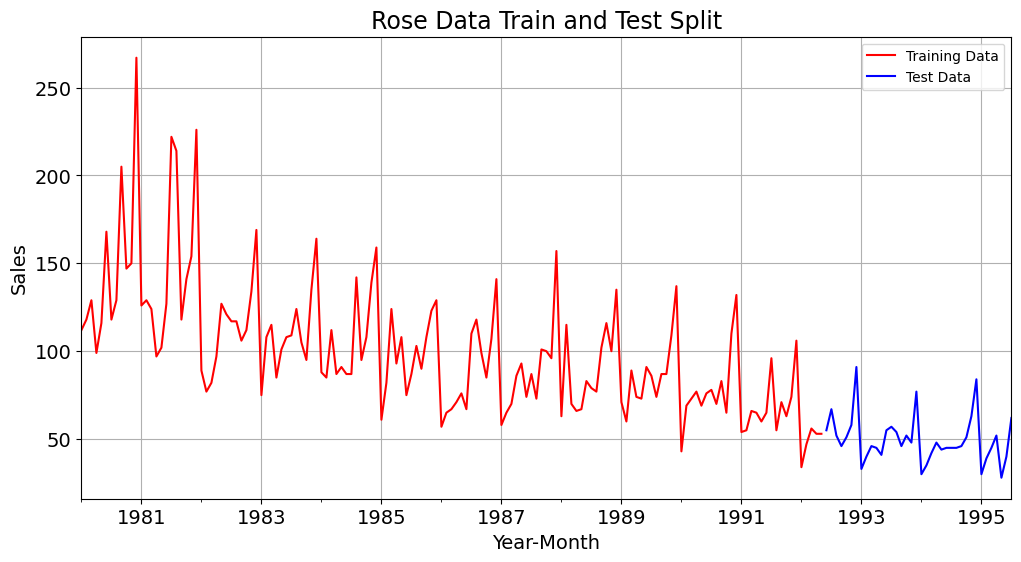

In [28]:
# Splitting the data into training and testing sets
# Assuming 'YearMonth' column contains datetime information
rose_data['YearMonth'] = pd.to_datetime(rose_data['YearMonth'])
rose_data.set_index('YearMonth', inplace=True)

train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(rose_data) * train_ratio)
rtrain = rose_data.iloc[:split_index]
rtest = rose_data.iloc[split_index:]

# Plotting Rose data train and test split
plt.figure(figsize=(12, 6))
rtrain['Rose'].plot(fontsize=14, color='red')
rtest['Rose'].plot(fontsize=14, color='blue')
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.title('Rose Data Train and Test Split', fontsize=17)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.show()


<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='YearMonth'>

<Axes: xlabel='YearMonth'>

Text(0.5, 1.0, 'Sparkling Data Train and Test Split')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

(array([132, 156, 180, 204, 228, 252, 276, 300]),
 [Text(132, 0, '1981'),
  Text(156, 0, '1983'),
  Text(180, 0, '1985'),
  Text(204, 0, '1987'),
  Text(228, 0, '1989'),
  Text(252, 0, '1991'),
  Text(276, 0, '1993'),
  Text(300, 0, '1995')])

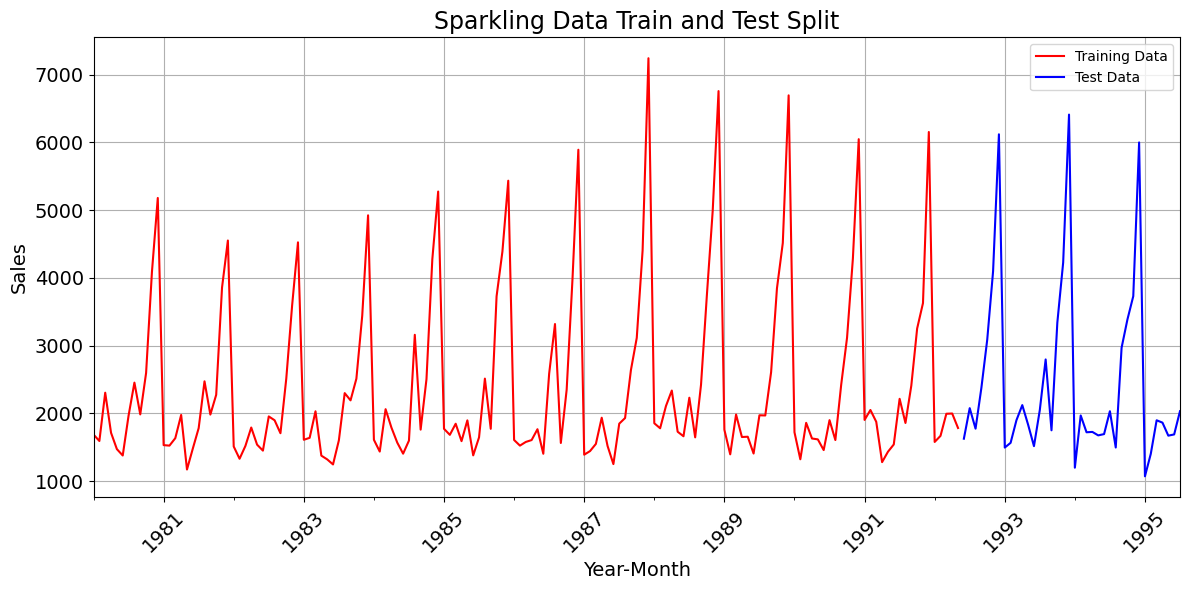

In [29]:
# Splitting the data into training and testing sets
# Assuming 'YearMonth' column contains datetime information
sparkling_data['YearMonth'] = pd.to_datetime(sparkling_data['YearMonth'])
sparkling_data.set_index('YearMonth', inplace=True)

train_ratio = 0.8  # 80% for training, 20% for testing
split_index = int(len(sparkling_data) * train_ratio)
strain = sparkling_data.iloc[:split_index]
stest = sparkling_data.iloc[split_index:]

# Plotting Sparkling data train and test split
plt.figure(figsize=(12, 6))
strain['Sparkling'].plot(fontsize=14, color='red')
stest['Sparkling'].plot(fontsize=14, color='blue')
plt.grid()
plt.legend(['Training Data', 'Test Data'])
plt.title('Sparkling Data Train and Test Split', fontsize=17)
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


# Model Building - Original Data

Forecasting Models Overview:
We will implement and evaluate the following forecasting models:

- Linear Regression
- Simple Average
- Moving Average
- Exponential Smoothing Models (Single, Double, Triple)

## Linear regression

### Rose

In [30]:
rtrain.shape
rtest.shape

(149, 1)

(38, 1)

In [31]:
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
print('Training Time Instance :','\n',train_time)
print('Test Time Instance :','\n',test_time)

Training Time Instance : 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time Instance : 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [32]:
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()

In [33]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5

Last few rows of Training Data


Rose  time
YearMonth             
1992-01-01  34.0   145
1992-02-01  47.0   146
1992-03-01  56.0   147
1992-04-01  53.0   148
1992-05-01  53.0   149

First few rows of Test Data


Rose  time
YearMonth             
1992-06-01  55.0   133
1992-07-01  67.0   134
1992-08-01  52.0   135
1992-09-01  46.0   136
1992-10-01  51.0   137

Last few rows of Test Data


Rose  time
YearMonth             
1995-03-01  45.0   166
1995-04-01  52.0   167
1995-05-01  28.0   168
1995-06-01  40.0   169
1995-07-01  62.0   170

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])

LinearRegression()

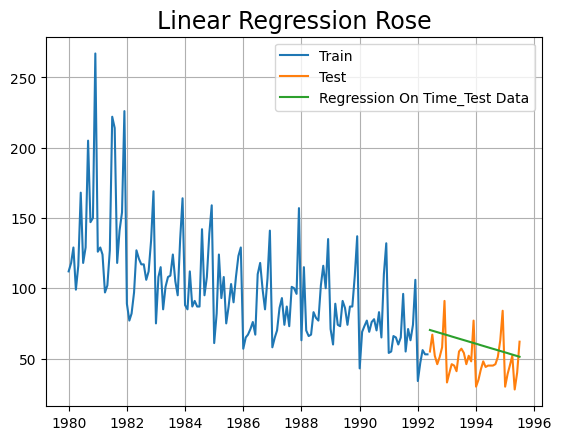

In [37]:
train_predictions_model_Rose = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model_Rose

test_predictions_model_Rose = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model_Rose

plt.plot(rtrain['Rose'], label='Train')
plt.plot(rtest['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.title('Linear Regression Rose', fontsize=17)
plt.legend(loc='best')
plt.grid();

In [38]:
from sklearn import metrics

In [39]:
rmse_model_Rose_test = metrics.mean_squared_error(rtest['Rose'],test_predictions_model_Rose,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model_Rose_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 17.510 


In [40]:
resultsDf_Rose = pd.DataFrame({'Test RMSE Rose': [rmse_model_Rose_test]},index=['RegressionOnTime'])
resultsDf_Rose

Test RMSE Rose
RegressionOnTime       17.510241

### Sparkling

In [41]:
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170]


In [42]:
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()

In [43]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

Last few rows of Training Data


Sparkling  time
YearMonth                  
1992-01-01       1577   145
1992-02-01       1667   146
1992-03-01       1993   147
1992-04-01       1997   148
1992-05-01       1783   149

First few rows of Test Data


Sparkling  time
YearMonth                  
1992-06-01       1625   133
1992-07-01       2076   134
1992-08-01       1773   135
1992-09-01       2377   136
1992-10-01       3088   137

Last few rows of Test Data


Sparkling  time
YearMonth                  
1995-03-01       1897   166
1995-04-01       1862   167
1995-05-01       1670   168
1995-06-01       1688   169
1995-07-01       2031   170

In [44]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

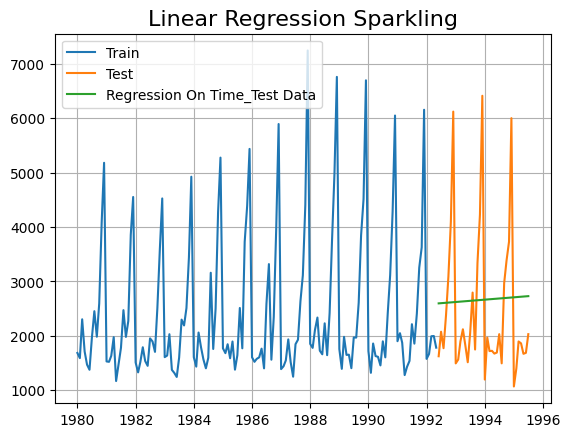

In [45]:
train_predictions_model_Sp = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model_Sp

test_predictions_model_Sp = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model_Sp

plt.plot(strain['Sparkling'], label='Train')
plt.plot(stest['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.title('Linear Regression Sparkling', fontsize=16)
plt.grid();

In [46]:
rmse_model_Sp_test = metrics.mean_squared_error(stest['Sparkling'],test_predictions_model_Sp,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model_Sp_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1349.042 


In [47]:
resultsDf_Sp =  pd.DataFrame({'Test RMSE Sparkling': [rmse_model_Sp_test]},index=['RegressionOnTime'])
resultsDf_ROT = pd.merge(resultsDf_Rose, resultsDf_Sp, left_index=True, right_index=True)
resultsDf_ROT


Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime       17.510241          1349.042457

## Simple Average

### Rose & Sparkling

In [48]:
# Creating copies of train and test data for Rose
SimpleAverage_train_rose = rtrain.copy()
SimpleAverage_test_rose = rtest.copy()

# Calculating the mean forecast using training data
SimpleAverage_test_rose['mean_forecast'] = rtrain['Rose'].mean()

# Display the test dataset with the added forecast column
print("First few rows of Simple Average Test Data (Rose):")
print(SimpleAverage_test_rose.head())


# Creating copies of train and test data for Sparkling
SimpleAverage_train_sparkling = strain.copy()
SimpleAverage_test_sparkling = stest.copy()

# Calculating the mean forecast using training data
SimpleAverage_test_sparkling['mean_forecast'] = strain['Sparkling'].mean()

# Display the test dataset with the added forecast column
print("First few rows of Simple Average Test Data (Sparkling):")
print(SimpleAverage_test_sparkling.head())


First few rows of Simple Average Test Data (Rose):
            Rose  mean_forecast
YearMonth                      
1992-06-01  55.0     100.167785
1992-07-01  67.0     100.167785
1992-08-01  52.0     100.167785
1992-09-01  46.0     100.167785
1992-10-01  51.0     100.167785
First few rows of Simple Average Test Data (Sparkling):
            Sparkling  mean_forecast
YearMonth                           
1992-06-01       1625    2388.610738
1992-07-01       2076    2388.610738
1992-08-01       1773    2388.610738
1992-09-01       2377    2388.610738
1992-10-01       3088    2388.610738


<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Simple Average Forecast - Rose')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

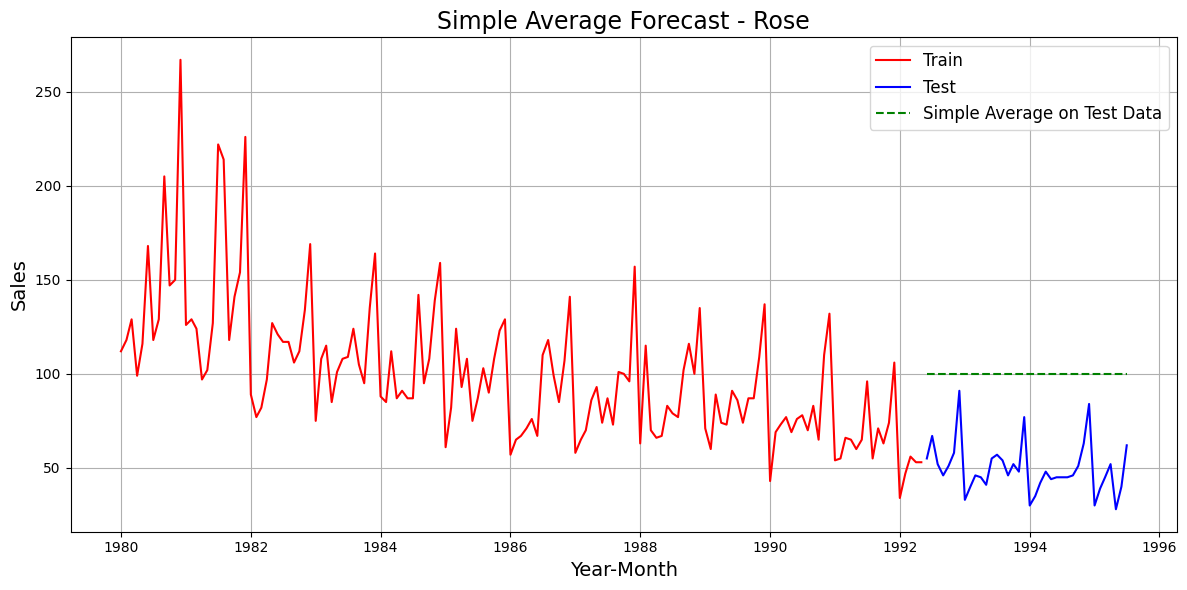

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Simple Average Forecast - Sparkling')

Text(0.5, 0, 'Year-Month')

Text(0, 0.5, 'Sales')

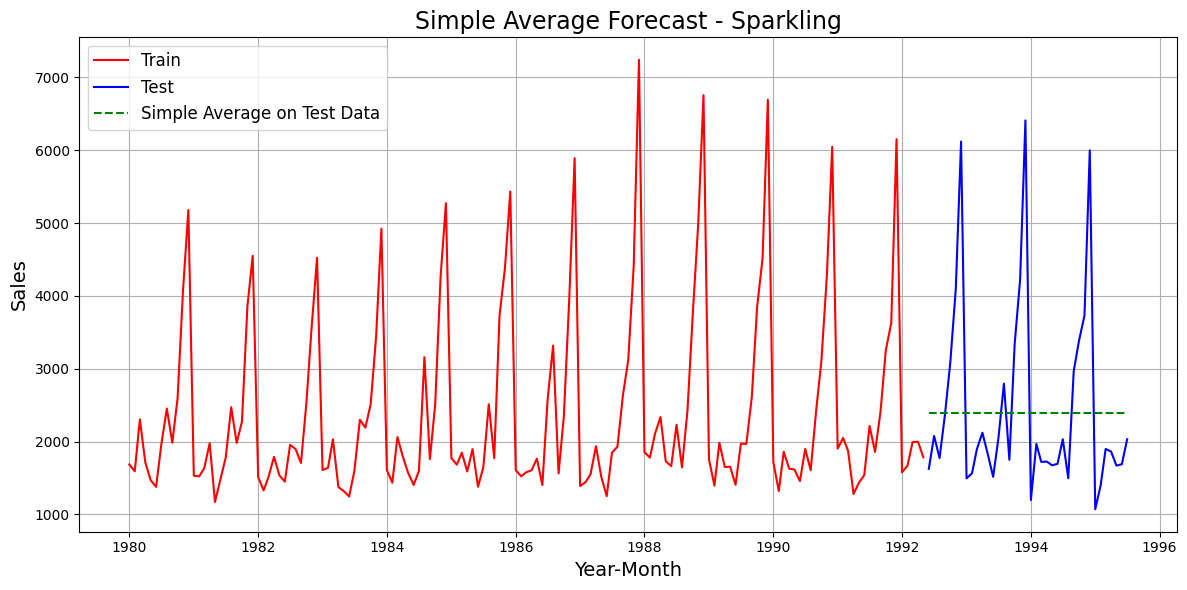

In [49]:
plt.figure(figsize=(12, 6))  # Set figure size

# Plot the training data
plt.plot(SimpleAverage_train_rose['Rose'], label='Train', color='red')

# Plot the actual test data
plt.plot(SimpleAverage_test_rose['Rose'], label='Test', color='blue')

# Plot the Simple Average forecast
plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data', color='green', linestyle='--')

# Add plot details
plt.legend(loc='best', fontsize=12)
plt.title("Simple Average Forecast - Rose", fontsize=17)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid()
plt.tight_layout()  # Adjust layout to prevent label clipping

# Display the plot
plt.show()



plt.figure(figsize=(12, 6))  # Set figure size

# Plot the training data
plt.plot(SimpleAverage_train_sparkling['Sparkling'], label='Train', color='red')

# Plot the actual test data
plt.plot(SimpleAverage_test_sparkling['Sparkling'], label='Test', color='blue')

# Plot the Simple Average forecast
plt.plot(SimpleAverage_test_sparkling['mean_forecast'], label='Simple Average on Test Data', color='green', linestyle='--')

# Add plot details
plt.legend(loc='best', fontsize=12)
plt.title("Simple Average Forecast - Sparkling", fontsize=17)
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Sales", fontsize=14)
plt.grid()
plt.tight_layout()  # Adjust layout to prevent label clipping

# Display the plot
plt.show()


In [50]:
# RMSE for Simple Average forecast on Rose Test Data
rmse_model_SA_Rose_test = metrics.mean_squared_error(rtest['Rose'], SimpleAverage_test_rose['mean_forecast'], squared=False)
print("For Simple Average forecast on Rose Test Data, RMSE is %3.3f" % (rmse_model_SA_Rose_test))

# RMSE for Simple Average forecast on Sparkling Test Data
rmse_model_SA_Sp_test = metrics.mean_squared_error(stest['Sparkling'], SimpleAverage_test_sparkling['mean_forecast'], squared=False)
print("For Simple Average forecast on Sparkling Test Data, RMSE is %3.3f" % (rmse_model_SA_Sp_test))


For Simple Average forecast on Rose Test Data, RMSE is 52.239
For Simple Average forecast on Sparkling Test Data, RMSE is 1331.038


In [51]:
# Create DataFrames for both RMSE results
resultsDf_SA_R = pd.DataFrame({'Test RMSE Rose': [rmse_model_SA_Rose_test]},index=['SimpleAverageModel'])
resultsDf_SA_Sp = pd.DataFrame({'Test RMSE Sparkling': [rmse_model_SA_Sp_test]},index=['SimpleAverageModel'])

# Concatenate the two DataFrames side by side
resultsDf_SA = pd.concat([resultsDf_SA_R, resultsDf_SA_Sp], axis=1)

# Print the combined DataFrame
print(resultsDf_SA)

                    Test RMSE Rose  Test RMSE Sparkling
SimpleAverageModel       52.239499          1331.037637


## Moving Average

### Rose

In [52]:
MovingAverage = rose_data.copy()
MovingAverage.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [53]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

Rose  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                        
1980-01-01  112.0         NaN         NaN         NaN         NaN
1980-02-01  118.0       115.0         NaN         NaN         NaN
1980-03-01  129.0       123.5         NaN         NaN         NaN
1980-04-01   99.0       114.0       114.5         NaN         NaN
1980-05-01  116.0       107.5       115.5         NaN         NaN

Text(0.5, 1.0, 'Moving Average Forecast - Rose')

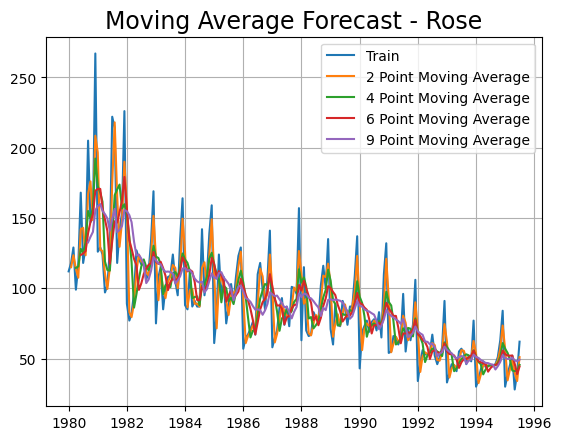

In [54]:
## Plotting on the whole data

plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17)

In [55]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

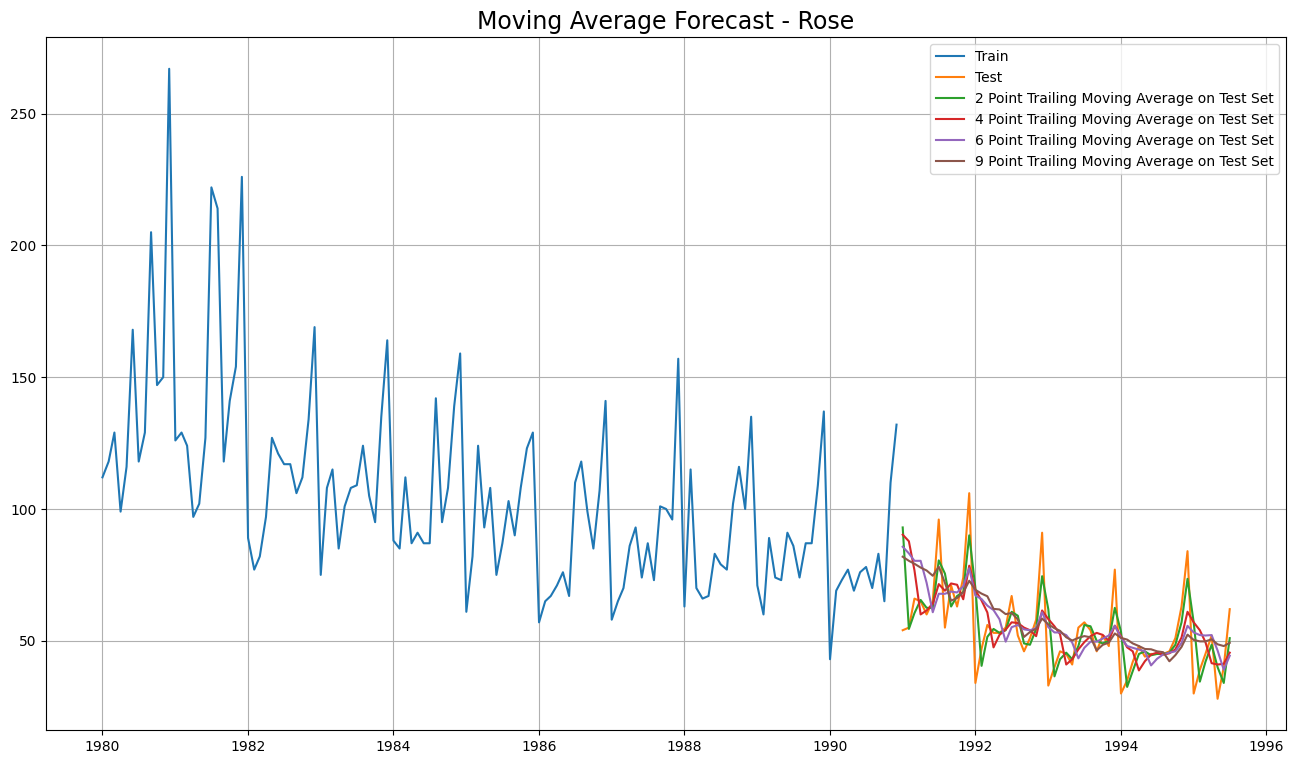

In [56]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'], label='9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Rose', fontsize=17);

In [57]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for 2-point moving average
rmse_2 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_2']))
print("RMSE for 2-point Moving Average:", rmse_2)

# Calculate RMSE for 4-point moving average
rmse_4 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_4']))
print("RMSE for 4-point Moving Average:", rmse_4)

# Calculate RMSE for 6-point moving average
rmse_6 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_6']))
print("RMSE for 6-point Moving Average:", rmse_6)

# Calculate RMSE for 9-point moving average
rmse_9 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Rose'], trailing_MovingAverage_test['Trailing_9']))
print("RMSE for 9-point Moving Average:", rmse_9)


RMSE for 2-point Moving Average: 11.529409036341487
RMSE for 4-point Moving Average: 14.455220824702371
RMSE for 6-point Moving Average: 14.572008589876495
RMSE for 9-point Moving Average: 14.731209378114992


In [58]:
resultsDf_MA_R = pd.DataFrame({'Test RMSE Rose': [rmse_2,rmse_4,rmse_6,rmse_9],}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])
resultsDf_MA_R

Test RMSE Rose
2pointTrailingMovingAverage       11.529409
4pointTrailingMovingAverage       14.455221
6pointTrailingMovingAverage       14.572009
9pointTrailingMovingAverage       14.731209

#### Sparkling

In [59]:
MovingAverage = sparkling_data.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

Sparkling  Trailing_2  Trailing_4  Trailing_6  Trailing_9
YearMonth                                                            
1980-01-01       1686         NaN         NaN         NaN         NaN
1980-02-01       1591      1638.5         NaN         NaN         NaN
1980-03-01       2304      1947.5         NaN         NaN         NaN
1980-04-01       1712      2008.0     1823.25         NaN         NaN
1980-05-01       1471      1591.5     1769.50         NaN         NaN

Text(0.5, 1.0, 'Moving Average - Sparkling')

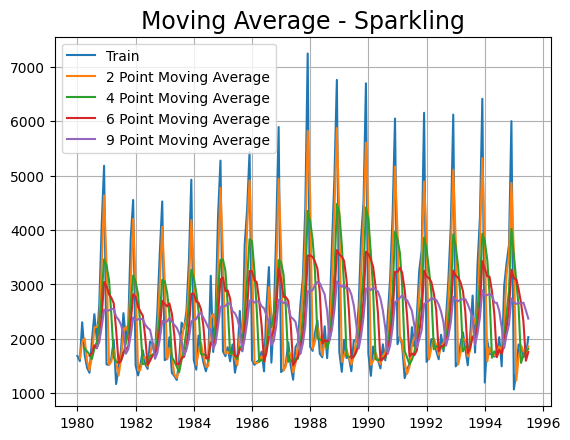

In [61]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average - Sparkling', fontsize=17)

In [62]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Moving Average Forecast - Sparkling')

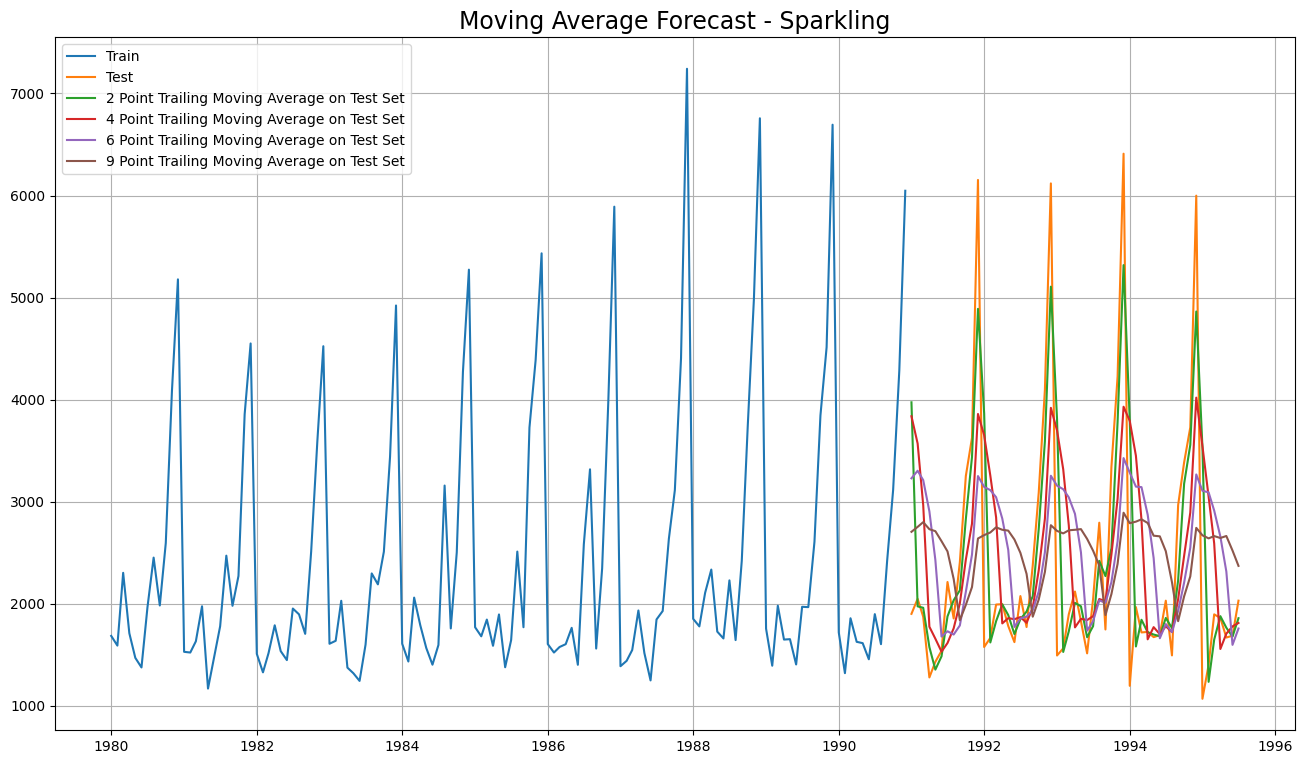

In [63]:
## Plotting on Test data

plt.figure(figsize=(16,9))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();
plt.title('Moving Average Forecast - Sparkling', fontsize=17)

In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for 2-point moving average
rmse_sparkling_2 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_2'].dropna()))
print("RMSE for 2-point Moving Average (Sparkling):", rmse_sparkling_2)

# Calculate RMSE for 4-point moving average
rmse_sparkling_4 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_4'].dropna()))
print("RMSE for 4-point Moving Average (Sparkling):", rmse_sparkling_4)

# Calculate RMSE for 6-point moving average
rmse_sparkling_6 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_6'].dropna()))
print("RMSE for 6-point Moving Average (Sparkling):", rmse_sparkling_6)

# Calculate RMSE for 9-point moving average
rmse_sparkling_9 = np.sqrt(mean_squared_error(trailing_MovingAverage_test['Sparkling'], trailing_MovingAverage_test['Trailing_9'].dropna()))
print("RMSE for 9-point Moving Average (Sparkling):", rmse_sparkling_9)


RMSE for 2-point Moving Average (Sparkling): 813.4006839972983
RMSE for 4-point Moving Average (Sparkling): 1156.589694081071
RMSE for 6-point Moving Average (Sparkling): 1283.9274280129855
RMSE for 9-point Moving Average (Sparkling): 1346.2783154241804


In [65]:
resultsDf_MA_Sp = pd.DataFrame({'Test RMSE Sparkling': [rmse_sparkling_2,rmse_sparkling_4,rmse_sparkling_6,rmse_sparkling_9],}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf_MA_Sp

Test RMSE Sparkling
2pointTrailingMovingAverage           813.400684
4pointTrailingMovingAverage          1156.589694
6pointTrailingMovingAverage          1283.927428
9pointTrailingMovingAverage          1346.278315

In [66]:
resultsDf_MA = resultsDf_MA_R.join(resultsDf_MA_Sp, how='outer')
resultsDf_MA

Test RMSE Rose  Test RMSE Sparkling
2pointTrailingMovingAverage       11.529409           813.400684
4pointTrailingMovingAverage       14.455221          1156.589694
6pointTrailingMovingAverage       14.572009          1283.927428
9pointTrailingMovingAverage       14.731209          1346.278315

### Rose all model's plot

In [67]:
# LR on Rose
train_time = [i+1 for i in range(len(rtrain))]
test_time = [i+133 for i in range(len(rtest))]
LinearRegression_train = rtrain.copy()
LinearRegression_test = rtest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# SA on Rose
SimpleAverage_train = rtrain.copy()
SimpleAverage_test = rtest.copy()
SimpleAverage_test['mean_forecast'] = rtrain['Rose'].mean()

# MA on Rose

MovingAverage = rose_data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']

LinearRegression()

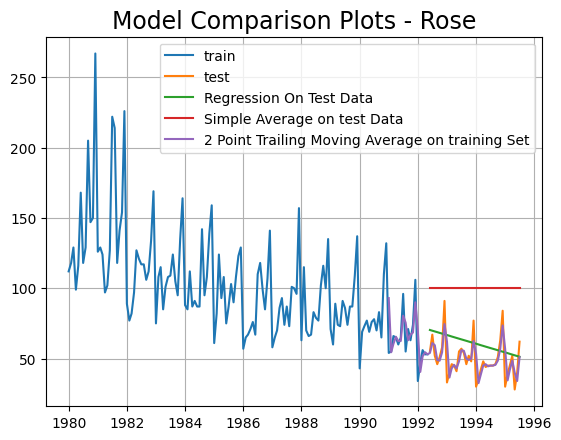

In [68]:
## Plotting on both rtraining and rtest data

plt.plot(rtrain['Rose'], label='train')
plt.plot(rtest['Rose'], label='test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Rose", fontsize=17)
plt.grid();

### Sparkling's all model's plot

In [69]:
# LR on Sparkling
train_time = [i+1 for i in range(len(strain))]
test_time = [i+133 for i in range(len(stest))]
LinearRegression_train = strain.copy()
LinearRegression_test = stest.copy()
LinearRegression_test['time'] = test_time
LinearRegression_train['time'] = train_time
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

# SA on Sparkling
SimpleAverage_train = strain.copy()
SimpleAverage_test = stest.copy()
SimpleAverage_test['mean_forecast'] = strain['Sparkling'].mean()

# MA on Sparkling

MovingAverage = sparkling_data.copy()
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
trailing_MovingAverage_test = MovingAverage[MovingAverage.index>='1991']


LinearRegression()

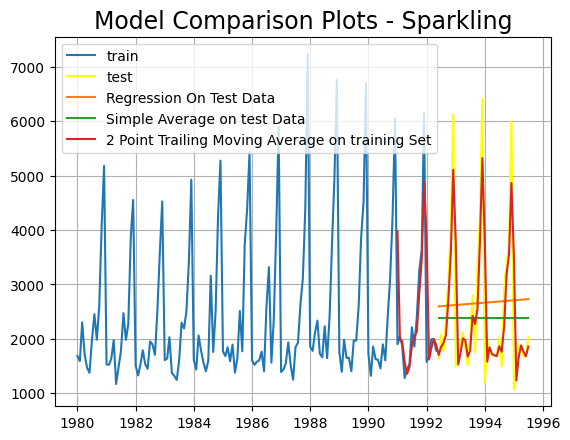

In [70]:
## Plotting on both rtraining and rtest data

plt.plot(strain['Sparkling'], label='train')
plt.plot(stest['Sparkling'], label='test', c='yellow')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots - Sparkling", fontsize=17)
plt.grid();

## Exponential Models (Single, Double, Triple)

In [71]:
# Importing the necessary packages

import statsmodels.tools.eval_measures as em
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

### SINGLE Exponential Smoothing with additive errors - ROSE

In [72]:
# create class
from statsmodels.tsa.api import SimpleExpSmoothing
model_SES = SimpleExpSmoothing(rtrain,initialization_method='estimated' )

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
model_SES_autofit = model_SES.fit(optimized=True)

In [74]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.10680637710294304,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.10600664798045,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [75]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_rose = model_SES_autofit.forecast(steps=len(rtest))
SES_predict_rose

1992-06-01    64.924605
1992-07-01    64.924605
1992-08-01    64.924605
1992-09-01    64.924605
1992-10-01    64.924605
1992-11-01    64.924605
1992-12-01    64.924605
1993-01-01    64.924605
1993-02-01    64.924605
1993-03-01    64.924605
1993-04-01    64.924605
1993-05-01    64.924605
1993-06-01    64.924605
1993-07-01    64.924605
1993-08-01    64.924605
1993-09-01    64.924605
1993-10-01    64.924605
1993-11-01    64.924605
1993-12-01    64.924605
1994-01-01    64.924605
1994-02-01    64.924605
1994-03-01    64.924605
1994-04-01    64.924605
1994-05-01    64.924605
1994-06-01    64.924605
1994-07-01    64.924605
1994-08-01    64.924605
1994-09-01    64.924605
1994-10-01    64.924605
1994-11-01    64.924605
1994-12-01    64.924605
1995-01-01    64.924605
1995-02-01    64.924605
1995-03-01    64.924605
1995-04-01    64.924605
1995-05-01    64.924605
1995-06-01    64.924605
1995-07-01    64.924605
Freq: MS, dtype: float64

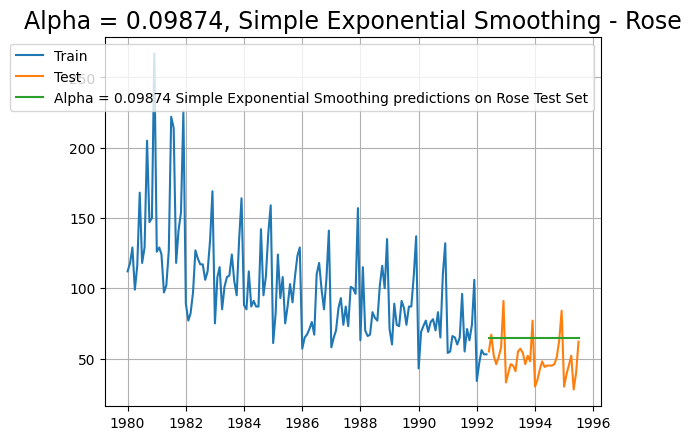

In [76]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha = 0.09874 Simple Exponential Smoothing predictions on Rose Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.09874, Simple Exponential Smoothing - Rose', fontsize=17);

In [77]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

print('SES RMSE:',mean_squared_error(rtest.values,SES_predict_rose.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_rose.values)[0])

resultsDf_rses = pd.DataFrame({'Test RMSE Rose': [em.rmse(rtest.values,SES_predict_rose.values)[0]],},index=['Simple Exponential Smoothing'])
resultsDf_rses

SES RMSE: 20.313630894252793
SES RMSE (calculated using statsmodels): 20.313630894252793


Test RMSE Rose
Simple Exponential Smoothing       20.313631

### SINGLE Exponential Smoothing with additive errors - SPARKLING

In [78]:
# create class
model_SES = SimpleExpSmoothing(strain,initialization_method='estimated' )

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:

model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [80]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.06651031879553812,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1989.2078501786773,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [81]:
# Using the fitted model on the training set to forecast on the test set
SES_predict_spark = model_SES_autofit.forecast(steps=len(stest))
SES_predict_spark

1992-06-01    2472.85165
1992-07-01    2472.85165
1992-08-01    2472.85165
1992-09-01    2472.85165
1992-10-01    2472.85165
1992-11-01    2472.85165
1992-12-01    2472.85165
1993-01-01    2472.85165
1993-02-01    2472.85165
1993-03-01    2472.85165
1993-04-01    2472.85165
1993-05-01    2472.85165
1993-06-01    2472.85165
1993-07-01    2472.85165
1993-08-01    2472.85165
1993-09-01    2472.85165
1993-10-01    2472.85165
1993-11-01    2472.85165
1993-12-01    2472.85165
1994-01-01    2472.85165
1994-02-01    2472.85165
1994-03-01    2472.85165
1994-04-01    2472.85165
1994-05-01    2472.85165
1994-06-01    2472.85165
1994-07-01    2472.85165
1994-08-01    2472.85165
1994-09-01    2472.85165
1994-10-01    2472.85165
1994-11-01    2472.85165
1994-12-01    2472.85165
1995-01-01    2472.85165
1995-02-01    2472.85165
1995-03-01    2472.85165
1995-04-01    2472.85165
1995-05-01    2472.85165
1995-06-01    2472.85165
1995-07-01    2472.85165
Freq: MS, dtype: float64

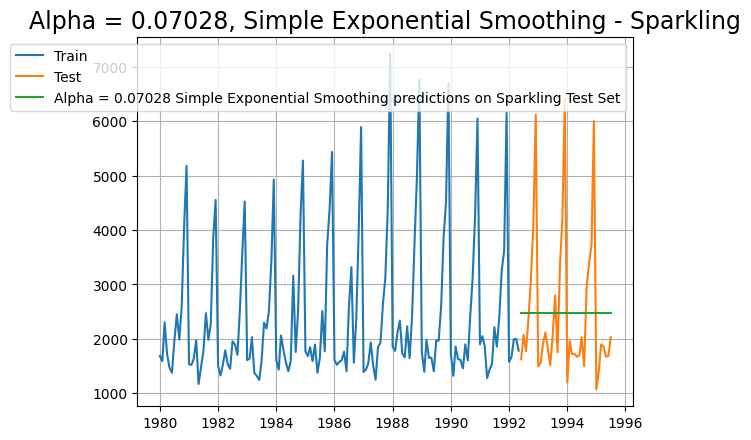

In [82]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha = 0.07028 Simple Exponential Smoothing predictions on Sparkling Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07028, Simple Exponential Smoothing - Sparkling', fontsize=17);

In [83]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [84]:
print('SES RMSE:',mean_squared_error(stest.values,SES_predict_spark.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(rtest.values,SES_predict_spark.values)[0])


resultsDf_sses = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(stest.values,SES_predict_spark.values)[0]]},index=['Simple Exponential Smoothing'])
resultsDf_sses

SES RMSE: 1329.4024023338343
SES RMSE (calculated using statsmodels): 2423.2046576464145


Test RMSE Sparkling
Simple Exponential Smoothing          1329.402402

In [85]:
resultsDf1 = resultsDf_rses.join(resultsDf_sses, how='outer')
resultsDf1

Test RMSE Rose  Test RMSE Sparkling
Simple Exponential Smoothing       20.313631          1329.402402

In [86]:
resultsDf2 = pd.concat([resultsDf_ROT, resultsDf1], axis=0)
resultsDf2

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.510241          1349.042457
Simple Exponential Smoothing       20.313631          1329.402402

In [87]:
resultsDf3 = resultsDf2.copy()

### Double Exponential Smoothing with Addition Errors - Rose


* A limitation of simple exponential smoothing is its poor performance in handling trended data.
* An enhanced version of SES, called the Double Exponential model, addresses this issue by incorporating two smoothing parameters.
* It is suitable for datasets exhibiting trend but lacking seasonality.
* The model distinguishes between two main components: Level and Trend.
* The Level represents the local mean, while the Trend captures directional changes.
* The smoothing parameter α governs the Level series, while β controls the Trend series.

In [88]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(rtrain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.09300264835403202, 'smoothing_trend': 0.048678204272200994, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 145.456069021616, 'initial_trend': -0.5632316608948438, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [89]:
# Forecasting using this model for the duration of the test set
DES_predict_rose =  model_DES.forecast(len(rtest))
DES_predict_rose

1992-06-01    61.119739
1992-07-01    60.359133
1992-08-01    59.598526
1992-09-01    58.837920
1992-10-01    58.077313
1992-11-01    57.316706
1992-12-01    56.556100
1993-01-01    55.795493
1993-02-01    55.034887
1993-03-01    54.274280
1993-04-01    53.513674
1993-05-01    52.753067
1993-06-01    51.992461
1993-07-01    51.231854
1993-08-01    50.471248
1993-09-01    49.710641
1993-10-01    48.950034
1993-11-01    48.189428
1993-12-01    47.428821
1994-01-01    46.668215
1994-02-01    45.907608
1994-03-01    45.147002
1994-04-01    44.386395
1994-05-01    43.625789
1994-06-01    42.865182
1994-07-01    42.104576
1994-08-01    41.343969
1994-09-01    40.583363
1994-10-01    39.822756
1994-11-01    39.062149
1994-12-01    38.301543
1995-01-01    37.540936
1995-02-01    36.780330
1995-03-01    36.019723
1995-04-01    35.259117
1995-05-01    34.498510
1995-06-01    33.737904
1995-07-01    32.977297
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions - Rose')

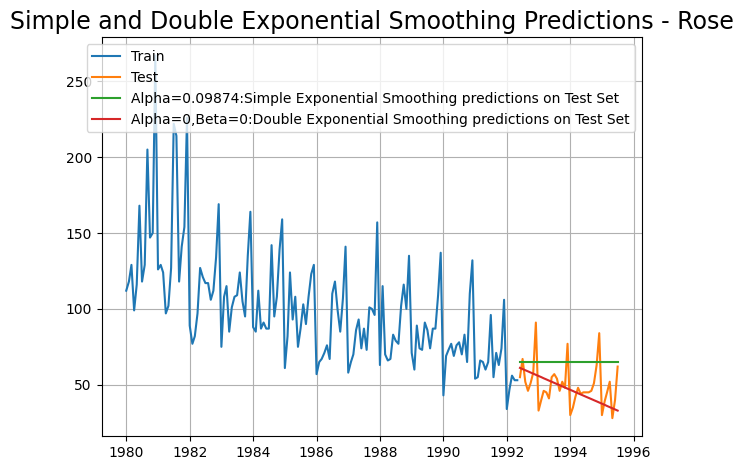

In [90]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Rose', fontsize=17);
plt.tight_layout()

In [91]:
print('DES RMSE:',mean_squared_error(rtest.values,DES_predict_rose.values,squared=False))

DES RMSE: 14.623741869519785


In [92]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Double Exponential Smoothing       14.623742

### Double Exponential Smoothing with Addition Errors - Sparkling

In [93]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(strain,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('Holt model Exponential Smoothing Estimated Parameters :')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters :

{'smoothing_level': 0.07610204211066955, 'smoothing_trend': 0.06918657704002944, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1505.4235921769614, 'initial_trend': 2.2739410406152416, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [94]:
# Forecasting using this model for the duration of the test set
DES_predict_spark =  model_DES.forecast(len(stest))
DES_predict_spark

1992-06-01    2410.519132
1992-07-01    2401.963861
1992-08-01    2393.408589
1992-09-01    2384.853317
1992-10-01    2376.298045
1992-11-01    2367.742773
1992-12-01    2359.187502
1993-01-01    2350.632230
1993-02-01    2342.076958
1993-03-01    2333.521686
1993-04-01    2324.966414
1993-05-01    2316.411143
1993-06-01    2307.855871
1993-07-01    2299.300599
1993-08-01    2290.745327
1993-09-01    2282.190055
1993-10-01    2273.634783
1993-11-01    2265.079512
1993-12-01    2256.524240
1994-01-01    2247.968968
1994-02-01    2239.413696
1994-03-01    2230.858424
1994-04-01    2222.303153
1994-05-01    2213.747881
1994-06-01    2205.192609
1994-07-01    2196.637337
1994-08-01    2188.082065
1994-09-01    2179.526793
1994-10-01    2170.971522
1994-11-01    2162.416250
1994-12-01    2153.860978
1995-01-01    2145.305706
1995-02-01    2136.750434
1995-03-01    2128.195163
1995-04-01    2119.639891
1995-05-01    2111.084619
1995-06-01    2102.529347
1995-07-01    2093.974075
Freq: MS, dt

Text(0.5, 1.0, 'Simple and Double Exponential Smoothing Predictions - Sparkling')

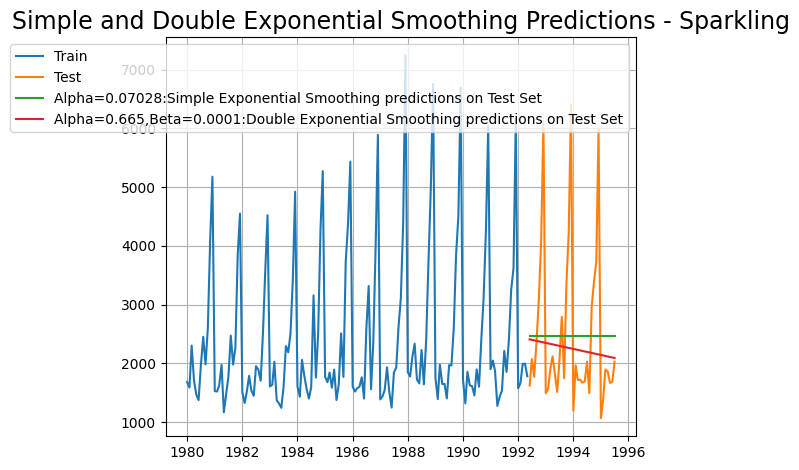

In [95]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions - Sparkling', fontsize=17);
plt.tight_layout()

In [96]:
print('DES RMSE:',mean_squared_error(stest.values,DES_predict_spark.values,squared=False))

DES RMSE: 1340.4527912673764


In [97]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,DES_predict_spark.values,squared=False)]}
                           ,index=['Double Exponential Smoothing'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Double Exponential Smoothing          1340.452791

In [98]:
resultsDf4 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf4

Test RMSE Rose  Test RMSE Sparkling
Double Exponential Smoothing       14.623742          1340.452791

In [99]:
resultsDf5 = pd.concat([resultsDf3, resultsDf4], axis=0)
resultsDf5

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.510241          1349.042457
Simple Exponential Smoothing       20.313631          1329.402402
Double Exponential Smoothing       14.623742          1340.452791

In [100]:
resultsDf6 = resultsDf5.copy()
resultsDf6

Test RMSE Rose  Test RMSE Sparkling
RegressionOnTime                   17.510241          1349.042457
Simple Exponential Smoothing       20.313631          1329.402402
Double Exponential Smoothing       14.623742          1340.452791

### Inference
In this observation, it's evident that Double Exponential Smoothing outperforms Simple Exponential Smoothing. This superiority stems from Double Exponential Smoothing's capability to capture the trend component effectively.

### Triple Exponential Smoothing with Addition Errors - Rose

In [101]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(rtrain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0925412263083052, 'smoothing_trend': 9.670945826104965e-07, 'smoothing_seasonal': 8.682941829523636e-05, 'damping_trend': nan, 'initial_level': 146.5021290484834, 'initial_trend': -0.5580678960217978, 'initial_seasons': array([-30.94675081, -19.15776544, -10.63030351, -19.45630872,
       -12.04917645,  -6.71002547,   5.04004014,   7.10173766,
         4.56670314,   2.2854166 ,  19.95587141,  61.14322782]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [102]:
# Forecasting using this model for the duration of the test set
TES_predict_add_rose =  model_TES.forecast(len(rtest))
TES_predict_add_rose

1992-06-01     56.164018
1992-07-01     67.356027
1992-08-01     68.859858
1992-09-01     65.767047
1992-10-01     62.927603
1992-11-01     80.039871
1992-12-01    120.669463
1993-01-01     28.021905
1993-02-01     39.252586
1993-03-01     47.221798
1993-04-01     37.837268
1993-05-01     44.685928
1993-06-01     49.467205
1993-07-01     60.659213
1993-08-01     62.163044
1993-09-01     59.070233
1993-10-01     56.230789
1993-11-01     73.343057
1993-12-01    113.972649
1994-01-01     21.325091
1994-02-01     32.555772
1994-03-01     40.524984
1994-04-01     31.140454
1994-05-01     37.989114
1994-06-01     42.770391
1994-07-01     53.962399
1994-08-01     55.466231
1994-09-01     52.373420
1994-10-01     49.533975
1994-11-01     66.646243
1994-12-01    107.275836
1995-01-01     14.628278
1995-02-01     25.858958
1995-03-01     33.828171
1995-04-01     24.443640
1995-05-01     31.292300
1995-06-01     36.073577
1995-07-01     47.265585
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Simple,Double and Triple Exponential Smoothing Predictions- Rose')

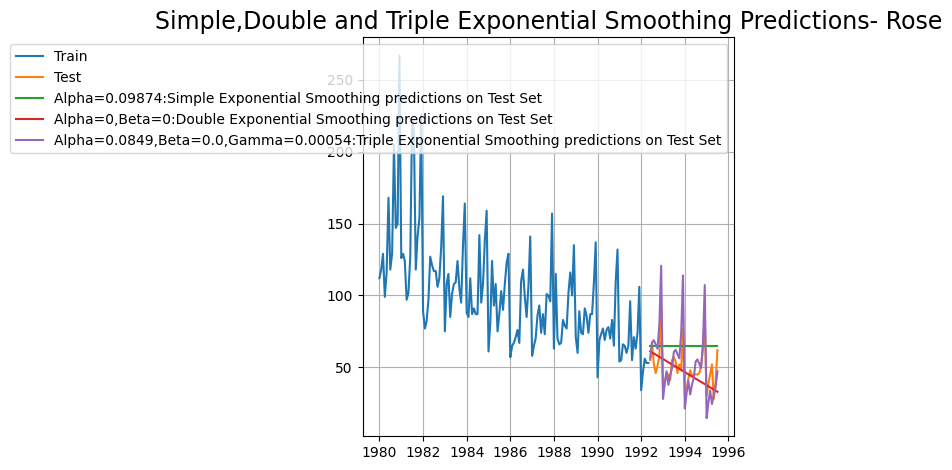

In [103]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Rose', fontsize=17);
plt.tight_layout()

In [104]:
print('TES RMSE:',mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False))

TES RMSE: 13.877335247156527


In [105]:
resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_add_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Additive Season)       13.877335

Triple Exponential Smoothing has performed the best on the test as expected since the data had both trend and seasonality.

### Triple Exponential Smoothing with Addition Errors - Sparkling

In [106]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(strain,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07597746896103838, 'smoothing_trend': 0.03256184654714162, 'smoothing_seasonal': 0.4450361636988428, 'damping_trend': nan, 'initial_level': 2356.5147815400774, 'initial_trend': -0.7669015592302134, 'initial_seasons': array([-636.2456513 , -722.99351356, -398.6449637 , -473.44618422,
       -808.43920231, -815.36464837, -384.24023953,   72.99804776,
       -237.45889973,  272.32539827, 1541.39210686, 2590.09065988]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [107]:
# Forecasting using this model for the duration of the test set
TES_predict_add_spark =  model_TES.forecast(len(stest))
TES_predict_add_spark

1992-06-01    1476.288297
1992-07-01    2064.103601
1992-08-01    1829.763937
1992-09-01    2408.994936
1992-10-01    3294.692928
1992-11-01    4063.150220
1992-12-01    6279.854707
1993-01-01    1724.588064
1993-02-01    1714.394071
1993-03-01    1946.482104
1993-04-01    1752.389844
1993-05-01    1529.878774
1993-06-01    1480.351131
1993-07-01    2068.166435
1993-08-01    1833.826770
1993-09-01    2413.057769
1993-10-01    3298.755761
1993-11-01    4067.213054
1993-12-01    6283.917540
1994-01-01    1728.650898
1994-02-01    1718.456905
1994-03-01    1950.544938
1994-04-01    1756.452677
1994-05-01    1533.941608
1994-06-01    1484.413964
1994-07-01    2072.229268
1994-08-01    1837.889604
1994-09-01    2417.120603
1994-10-01    3302.818595
1994-11-01    4071.275887
1994-12-01    6287.980374
1995-01-01    1732.713732
1995-02-01    1722.519738
1995-03-01    1954.607772
1995-04-01    1760.515511
1995-05-01    1538.004442
1995-06-01    1488.476798
1995-07-01    2076.292102
Freq: MS, dt

Text(0.5, 1.0, 'Simple,Double and Triple Exponential Smoothing Predictions- Sparkling')

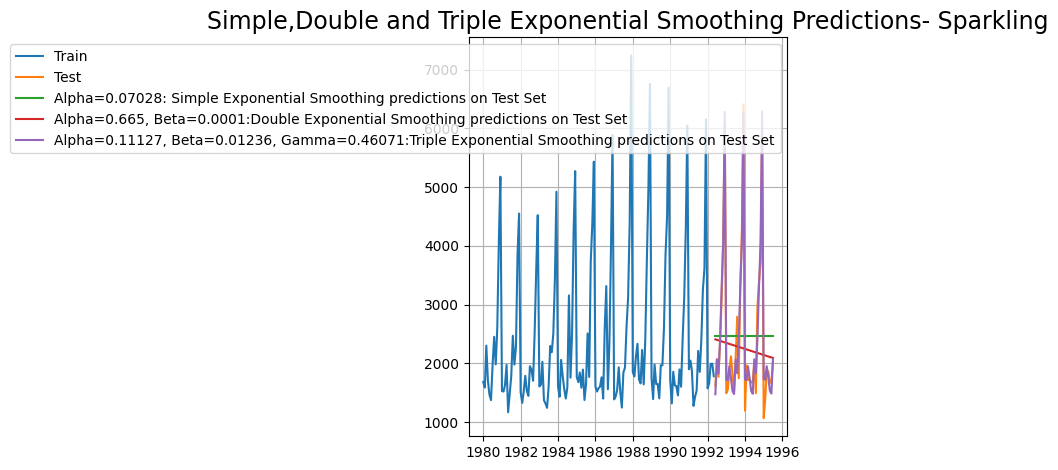

In [108]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11127, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions- Sparkling', fontsize=17);
plt.tight_layout()

In [109]:
print('TES RMSE:',mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False))

TES RMSE: 304.2470291530725


In [110]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_add_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Additive Season)'])

import textwrap
textwrap.TextWrapper(resultsDf_temp.index)

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Additive Season)           304.247029

In [111]:
resultsDf7 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf7

Test RMSE Rose  \
Triple Exponential Smoothing (Additive Season)       13.877335   

                                                Test RMSE Sparkling  
Triple Exponential Smoothing (Additive Season)           304.247029

In [112]:
resultsDf8 = pd.concat([resultsDf6, resultsDf7], axis=0)
resultsDf8

Test RMSE Rose  \
RegressionOnTime                                     17.510241   
Simple Exponential Smoothing                         20.313631   
Double Exponential Smoothing                         14.623742   
Triple Exponential Smoothing (Additive Season)       13.877335   

                                                Test RMSE Sparkling  
RegressionOnTime                                        1349.042457  
Simple Exponential Smoothing                            1329.402402  
Double Exponential Smoothing                            1340.452791  
Triple Exponential Smoothing (Additive Season)           304.247029

In [113]:
resultsDf9 = resultsDf8.copy()

### Taking MULTIPLICATIVE SEASONALITY- ROSE

In [114]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(rtrain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09838362433769235, 'smoothing_trend': 4.308904957183754e-05, 'smoothing_seasonal': 5.393171948120708e-06, 'damping_trend': nan, 'initial_level': 179.99542967597472, 'initial_trend': -0.7269312641722373, 'initial_seasons': array([0.60418237, 0.68358024, 0.75218839, 0.66450106, 0.73839731,
       0.79604354, 0.88845658, 0.92796936, 0.87807262, 0.86097162,
       1.00251842, 1.3756637 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [115]:
# Forecasting using this model for the duration of the test set
TES_predict_am_rose =  model_TES_am.forecast(len(rtest))
TES_predict_am_rose

1992-06-01    57.311237
1992-07-01    63.318800
1992-08-01    65.460093
1992-09-01    61.302321
1992-10-01    59.482576
1992-11-01    68.533067
1992-12-01    93.041486
1993-01-01    40.423942
1993-02-01    45.239485
1993-03-01    49.233237
1993-04-01    43.010891
1993-05-01    47.257064
1993-06-01    50.367664
1993-07-01    55.569134
1993-08-01    57.365797
1993-09-01    53.643221
1993-10-01    51.972644
1993-11-01    59.788467
1993-12-01    81.042100
1994-01-01    35.153903
1994-02-01    39.276869
1994-03-01    42.672177
1994-04-01    37.214682
1994-05-01    40.816304
1994-06-01    43.424091
1994-07-01    47.819469
1994-08-01    49.271500
1994-09-01    45.984120
1994-10-01    44.462711
1994-11-01    51.043867
1994-12-01    69.042714
1995-01-01    29.883864
1995-02-01    33.314253
1995-03-01    36.111116
1995-04-01    31.418472
1995-05-01    34.375543
1995-06-01    36.480518
1995-07-01    40.069804
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose')

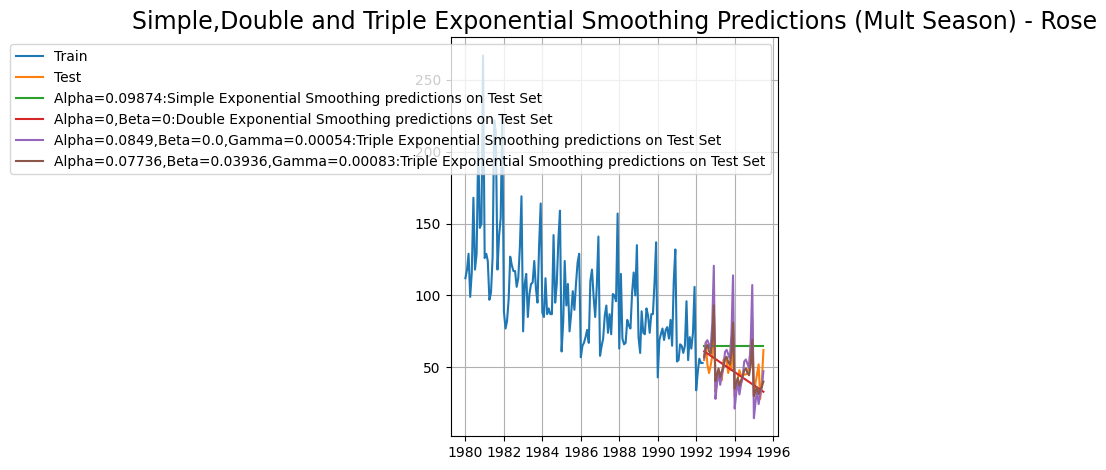

In [116]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(rtrain, label='Train')
plt.plot(rtest, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.09874:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0,Beta=0:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_rose, label='Alpha=0.0849,Beta=0.0,Gamma=0.00054:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am_rose, label='Alpha=0.07736,Beta=0.03936,Gamma=0.00083:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Rose', fontsize=17);
plt.tight_layout()

In [117]:
# Report model accuracy

print('TES_am RMSE_rose:',mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False))

TES_am RMSE_rose: 8.405440935004146


In [118]:
# resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
#                            ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

# resultsDf = pd.concat([resultsDf, resultsDf_temp])
# resultsDf

resultsDf_temp = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(rtest.values,TES_predict_am_rose.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp

Test RMSE Rose
Triple Exponential Smoothing (Multiplicative Se...        8.405441

We see that the multiplicative seasonality model has not done that well when compared to the additive seasonality Triple Exponential Smoothing model.

### Taking MULTIPLICATIVE SEASONALITY- Sparkling

In [119]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(strain,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07584256131987539, 'smoothing_trend': 0.07583422271523024, 'smoothing_seasonal': 0.34233433876915803, 'damping_trend': nan, 'initial_level': 2356.412102502696, 'initial_trend': -14.463316137194582, 'initial_seasons': array([0.71921463, 0.68882321, 0.91130084, 0.80775612, 0.6560146 ,
       0.65112341, 0.88527791, 1.13904475, 0.93472337, 1.23139879,
       1.91847567, 2.43598115]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [120]:
# Forecasting using this model for the duration of the test set
TES_predict_am_spark =  model_TES_am.forecast(len(stest))
TES_predict_am_spark

1992-06-01    1487.921172
1992-07-01    2075.167617
1992-08-01    1939.967766
1992-09-01    2424.714659
1992-10-01    3329.846009
1992-11-01    4197.371806
1992-12-01    6370.039146
1993-01-01    1739.970569
1993-02-01    1707.275401
1993-03-01    1953.708848
1993-04-01    1771.980849
1993-05-01    1589.498603
1993-06-01    1504.947964
1993-07-01    2098.891848
1993-08-01    1962.125223
1993-09-01    2452.382347
1993-10-01    3367.805783
1993-11-01    4245.175838
1993-12-01    6442.518983
1994-01-01    1759.749618
1994-02-01    1726.664422
1994-03-01    1975.875562
1994-04-01    1792.066692
1994-05-01    1607.498961
1994-06-01    1521.974756
1994-07-01    2122.616079
1994-08-01    1984.282680
1994-09-01    2480.050036
1994-10-01    3405.765557
1994-11-01    4292.979871
1994-12-01    6514.998819
1995-01-01    1779.528667
1995-02-01    1746.053443
1995-03-01    1998.042276
1995-04-01    1812.152536
1995-05-01    1625.499320
1995-06-01    1539.001548
1995-07-01    2146.340310
Freq: MS, dt

Text(0.5, 1.0, 'Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling')

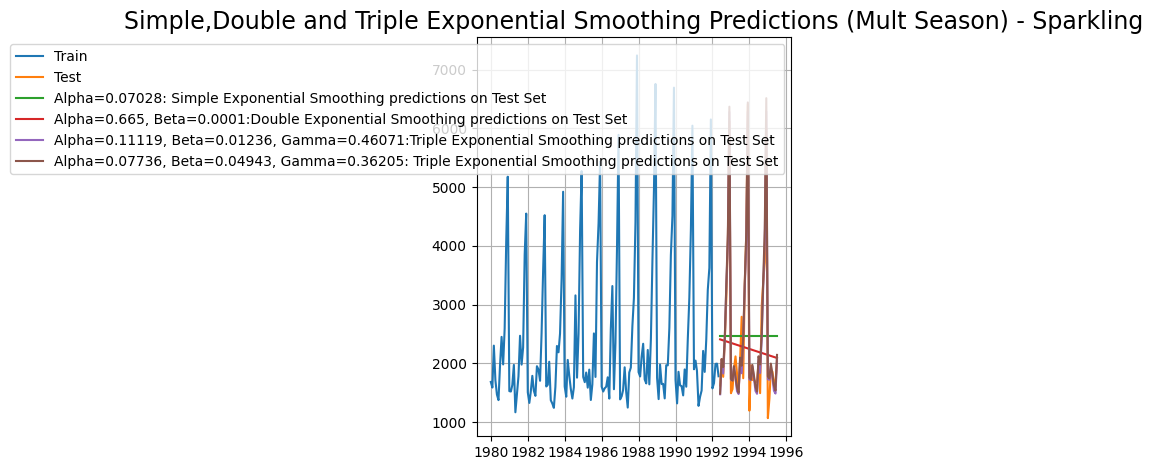

In [121]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(strain, label='Train')
plt.plot(stest, label='Test')

plt.plot(SES_predict_spark, label='Alpha=0.07028: Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_spark, label='Alpha=0.665, Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_add_spark, label='Alpha=0.11119, Beta=0.01236, Gamma=0.46071:Triple Exponential Smoothing predictions on Test Set')

plt.plot(TES_predict_am_spark, label='Alpha=0.07736, Beta=0.04943, Gamma=0.36205: Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions (Mult Season) - Sparkling', fontsize=17);
plt.tight_layout()

In [122]:
#Report model accuracy

print('TES_am RMSE_spark:',mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False))

TES_am RMSE_spark: 318.6954705224248


In [123]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(stest.values,TES_predict_am_spark.values,squared=False)]}
                           ,index=['Triple Exponential Smoothing (Multiplicative Season)'])



resultsDf_temp1

Test RMSE Sparkling
Triple Exponential Smoothing (Multiplicative Se...           318.695471

In [124]:
resultsDf10 = resultsDf_temp.join(resultsDf_temp1, how='outer')
resultsDf10

Test RMSE Rose  \
Triple Exponential Smoothing (Multiplicative Se...        8.405441   

                                                    Test RMSE Sparkling  
Triple Exponential Smoothing (Multiplicative Se...           318.695471

In [125]:
resultsDf11 = pd.concat([resultsDf9,resultsDf_SA,resultsDf_MA,resultsDf10], axis=0)
resultsDf11

Test RMSE Rose  \
RegressionOnTime                                         17.510241   
Simple Exponential Smoothing                             20.313631   
Double Exponential Smoothing                             14.623742   
Triple Exponential Smoothing (Additive Season)           13.877335   
SimpleAverageModel                                       52.239499   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Triple Exponential Smoothing (Multiplicative Se...        8.405441   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402402  
Double Exponential Smoothing                                1340.452791  
Triple Exponential Smoothing (Additive Season)               304.247029  
SimpleAverageModel                                          1331.037637  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Triple Exponential Smoothing (Multiplicative Se...           318.695471

In [126]:
resultsDf12 = resultsDf11.copy()
resultsDf12

Test RMSE Rose  \
RegressionOnTime                                         17.510241   
Simple Exponential Smoothing                             20.313631   
Double Exponential Smoothing                             14.623742   
Triple Exponential Smoothing (Additive Season)           13.877335   
SimpleAverageModel                                       52.239499   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Triple Exponential Smoothing (Multiplicative Se...        8.405441   

                                                    Test RMSE Sparkling  
RegressionOnTime                                            1349.042457  
Simple Exponential Smoothing                                1329.402402  
Double Exponential Smoothing                                1340.452791  
Triple Exponential Smoothing (Additive Season)               304.247029  
SimpleAverageModel                                          1331.037637  
2pointTrailingMovingAverage                                  813.400684  
4pointTrailingMovingAverage                                 1156.589694  
6pointTrailingMovingAverage                                 1283.927428  
9pointTrailingMovingAverage                                 1346.278315  
Triple Exponential Smoothing (Multiplicative Se...           318.695471

### Best model

##### Rose — Triple Exponential Smoothing (Multiplicative Season)
##### Sparkling — Triple Exponential Smoothing (Additive Season)

# Rose wine dataset

## Check for Stationarity

The hypothesis in a simple form for the ADF test is:

𝐻0
  : The Time Series has a unit root and is thus non-stationary.;
𝐻1
  : The Time Series does not have a unit root and is thus stationary.

In [127]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

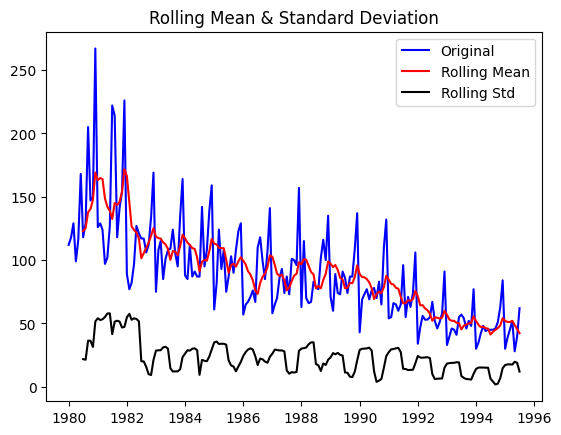

Results of Dickey-Fuller Test:
Test Statistic                  -1.874856
p-value                          0.343981
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [128]:
test_stationarity(rose_data['Rose'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

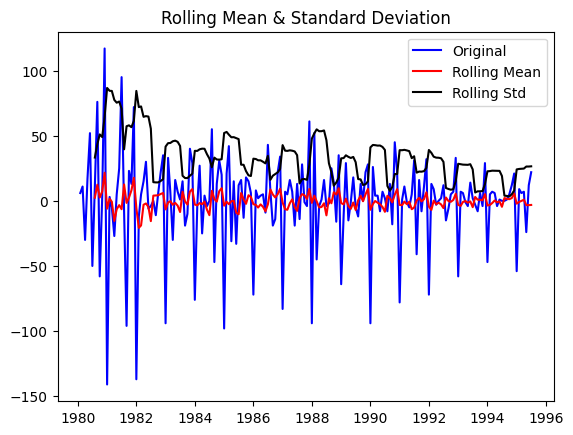

Results of Dickey-Fuller Test:
Test Statistic                -8.044139e+00
p-value                        1.813580e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [129]:
test_stationarity(rose_data['Rose'].diff().dropna())

The p-value is very small (significantly less than 0.05), which suggests that we can reject the null hypothesis of a unit root (non-stationarity). This means the series is likely stationary.

# Check for stationarity of the Training Data Time Series.

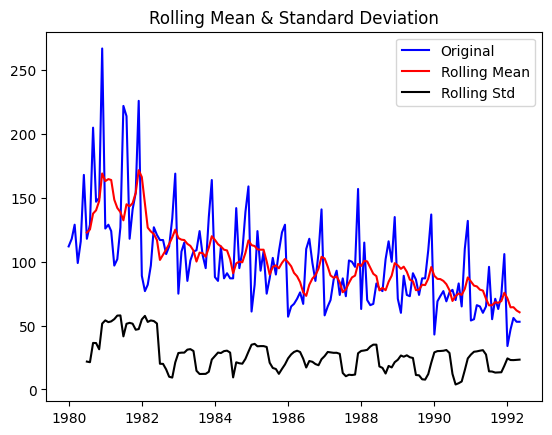

Results of Dickey-Fuller Test:
Test Statistic                  -1.649379
p-value                          0.457364
#Lags Used                      13.000000
Number of Observations Used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64 



In [130]:
test_stationarity(rtrain['Rose'])

We see that the series is not stationary at α= 0.05.

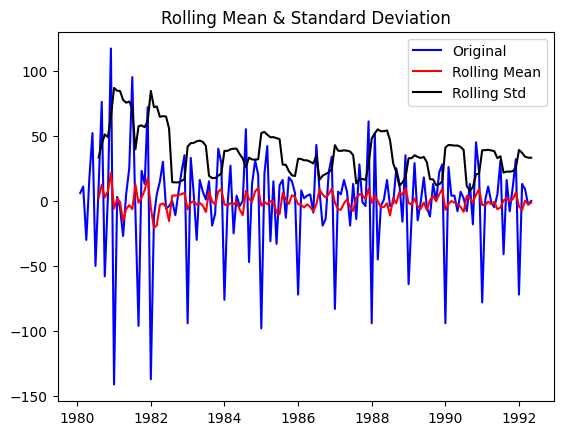

Results of Dickey-Fuller Test:
Test Statistic                -7.132106e+00
p-value                        3.496102e-10
#Lags Used                     1.200000e+01
Number of Observations Used    1.350000e+02
Critical Value (1%)           -3.479743e+00
Critical Value (5%)           -2.883198e+00
Critical Value (10%)          -2.578320e+00
dtype: float64 



In [131]:
test_stationarity(rtrain['Rose'].diff().dropna())

With a p-value of 3.496102e-10, which is extremely small, we can reject the null hypothesis of the Augmented Dickey-Fuller (ADF) test.

In [132]:
rtrain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    149 non-null    float64
dtypes: float64(1)
memory usage: 2.3 KB


# Check the ACF and PACF of the training data.

In [133]:
rtrain_diff = rtrain.diff(periods=1).dropna()
rtrain_diff

Rose
YearMonth       
1980-02-01   6.0
1980-03-01  11.0
1980-04-01 -30.0
1980-05-01  17.0
1980-06-01  52.0
...          ...
1992-01-01 -72.0
1992-02-01  13.0
1992-03-01   9.0
1992-04-01  -3.0
1992-05-01   0.0

[148 rows x 1 columns]

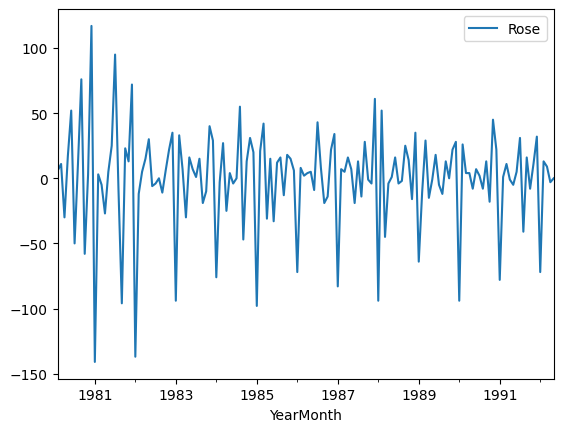

In [134]:
rtrain_diff.plot();

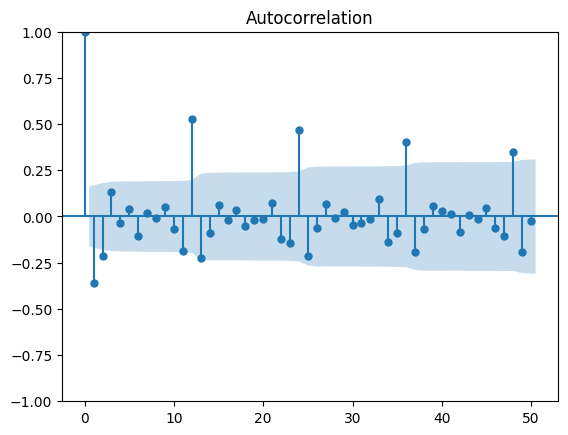

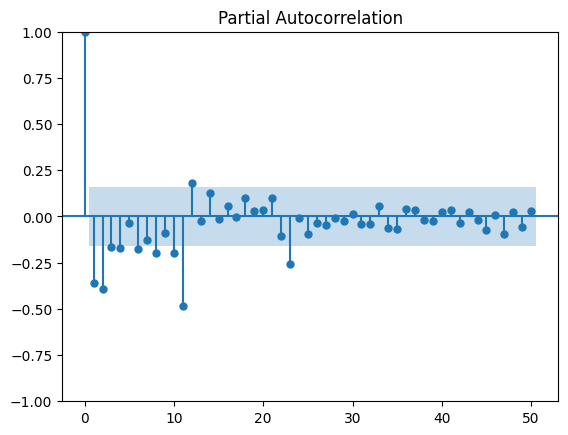

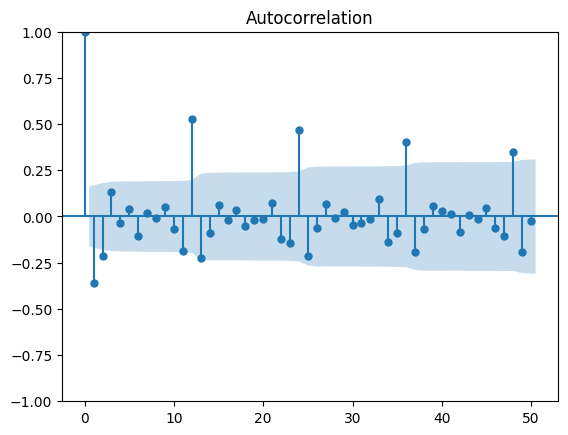

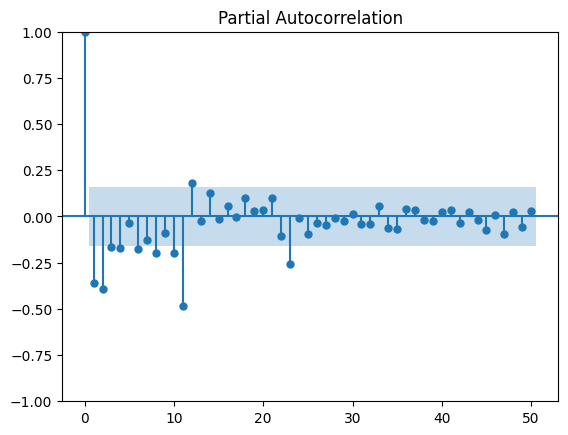

In [135]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt



rtrain_diff = rtrain.diff(periods=1).dropna()
plot_acf(rtrain_diff.dropna(), lags=50,title='Autocorrelation')
plot_pacf(rtrain_diff.dropna(), lags=50, title='Partial Autocorrelation')


# Show the plots
plt.show()

### Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Acknowledging the seasonality in the data, it's indeed prudent to consider a SARIMA model. However, before proceeding, let's test whether an ARIMA or SARIMA model better fits the data by comparing their Akaike Information Criteria (AIC) values. We'll choose the model with the lowest AIC as the preferred option.

In [136]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [137]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [138]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Initialize the DataFrame

for param in pdq:
    # Fit the ARIMA model
    ARMA_model = ARIMA(rtrain['Rose'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARMA_model.aic))
    
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame([{'param': param, 'AIC': ARMA_model.aic}])
    
    # Use pd.concat() to add the new row
    ARMA_AIC = pd.concat([ARMA_AIC, temp_df], ignore_index=True)


ARIMA(0, 0, 0) - AIC:1501.7693768769623
ARIMA(0, 0, 1) - AIC:1474.4721629545493
ARIMA(0, 0, 2) - AIC:1474.7683726457462
ARIMA(1, 0, 0) - AIC:1467.27757863106
ARIMA(1, 0, 1) - AIC:1451.9021414808885
ARIMA(1, 0, 2) - AIC:1449.5051250476374
ARIMA(2, 0, 0) - AIC:1466.8445855048215


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:1450.457006655476
ARIMA(2, 0, 2) - AIC:1448.974414978228


In [139]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 0, 2)  1448.974415
5  (1, 0, 2)  1449.505125
7  (2, 0, 1)  1450.457007
4  (1, 0, 1)  1451.902141
6  (2, 0, 0)  1466.844586
3  (1, 0, 0)  1467.277579
1  (0, 0, 1)  1474.472163
2  (0, 0, 2)  1474.768373
0  (0, 0, 0)  1501.769377

In [140]:
auto_ARIMA = ARIMA(rtrain['Rose'], order=(2,0,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -718.487
Date:                Sun, 05 Jan 2025   AIC                           1448.974
Time:                        16:22:16   BIC                           1466.998
Sample:                    01-01-1980   HQIC                          1456.297
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1395     41.173      2.432      0.015      19.442     180.837
ar.L1          0.5032      0.258      1.954      0.051      -0.002       1.008
ar.L2          0.4858      0.249      1.950      0.0

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [141]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))

In [142]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming rtest['Rose'] and predicted_auto_ARIMA are defined
# Calculate RMSE
rmse = mean_squared_error(rtest['Rose'], predicted_auto_ARIMA, squared=False)

# Define a function for MAPE if not already available
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(rtest['Rose'], predicted_auto_ARIMA)

# Create the results DataFrame
resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse], 'Test MAPE Rose': [mape]}, 
                         index=['ARIMA(2,0,2)'])

print(resultsDf)


              Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)       26.135542       56.709217


## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [143]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [144]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [145]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Initialize the DataFrame

for param in pdq:
    # Fit the ARIMA model
    ARMA_model = ARIMA(rtrain['Rose'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARMA_model.aic))
    
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame([{'param': param, 'AIC': ARMA_model.aic}])
    
    # Use pd.concat() to add the new row
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)


ARIMA(0, 1, 0) - AIC:1499.1786931796523
ARIMA(0, 1, 1) - AIC:1438.6436090916682
ARIMA(0, 1, 2) - AIC:1436.1992828019977
ARIMA(1, 1, 0) - AIC:1480.559364625044
ARIMA(1, 1, 1) - AIC:1437.1555425056208
ARIMA(1, 1, 2) - AIC:1435.6572959808964
ARIMA(2, 1, 0) - AIC:1457.8711788191408
ARIMA(2, 1, 1) - AIC:1437.704813623815
ARIMA(2, 1, 2) - AIC:1437.6378674876196


In [146]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
5  (1, 1, 2)  1435.657296
2  (0, 1, 2)  1436.199283
4  (1, 1, 1)  1437.155543
8  (2, 1, 2)  1437.637867
7  (2, 1, 1)  1437.704814
1  (0, 1, 1)  1438.643609
6  (2, 1, 0)  1457.871179
3  (1, 1, 0)  1480.559365
0  (0, 1, 0)  1499.178693

In [147]:
auto_ARIMA = ARIMA(rtrain['Rose'], order=(1,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -713.829
Date:                Sun, 05 Jan 2025   AIC                           1435.657
Time:                        16:22:17   BIC                           1447.646
Sample:                    01-01-1980   HQIC                          1440.528
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4888      0.240     -2.038      0.042      -0.959      -0.019
ma.L1         -0.2206      0.221     -0.999      0.318      -0.654       0.212
ma.L2         -0.6175      0.178     -3.463      0.0

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [148]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(rtest))

In [149]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(rtest['Rose'],predicted_auto_ARIMA,squared=False)
print(rmse)

20.91540531278124


In [150]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(1,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)       26.135542       56.709217
ARIMA(1,1,2)       20.915405       56.709217

In [151]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(1,0,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -721.951
Date:                Sun, 05 Jan 2025   AIC                           1451.902
Time:                        16:22:17   BIC                           1463.918
Sample:                    01-01-1980   HQIC                          1456.784
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.1651     36.934      2.685      0.007      26.775     171.555
ar.L1          0.9912      0.016     63.729      0.000       0.961       1.022
ma.L1         -0.8774      0.061    -14.498      0.0

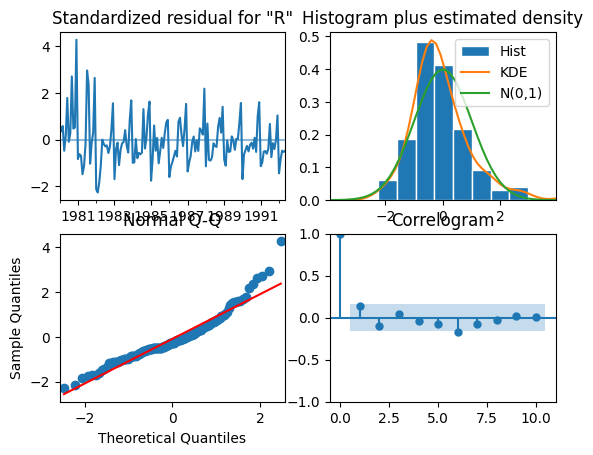

In [152]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test by using this model and evaluate the model.

In [153]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [154]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming rtest['Rose'] and predicted_manual_ARIMA are defined
rmse = mean_squared_error(rtest['Rose'], predicted_manual_ARIMA, squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'], predicted_manual_ARIMA)
print('RMSE:', rmse, '\nMAPE:', mape)


RMSE: 25.628545939986257 
MAPE: 0.5544592692753597


In [155]:
temp_resultsR2 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(1,0,1)'])


resultsR2 = pd.concat([resultsDf,temp_resultsR2])
resultsR2

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)       26.135542       56.709217
ARIMA(1,1,2)       20.915405       56.709217
ARIMA(1,0,1)       25.628546        0.554459

In [156]:
manual_ARIMA = ARIMA(rtrain['Rose'], order=(2,0,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  149
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -718.487
Date:                Sun, 05 Jan 2025   AIC                           1448.974
Time:                        16:22:18   BIC                           1466.998
Sample:                    01-01-1980   HQIC                          1456.297
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1395     41.173      2.432      0.015      19.442     180.837
ar.L1          0.5032      0.258      1.954      0.051      -0.002       1.008
ar.L2          0.4858      0.249      1.950      0.0

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


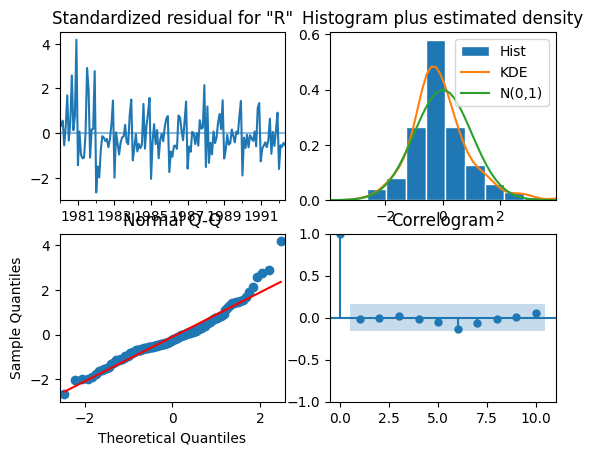

In [157]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test by using this model and evaluate the model.

In [158]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(rtest))

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Assuming rtest['Rose'] and predicted_manual_ARIMA are defined
rmse = mean_squared_error(rtest['Rose'], predicted_manual_ARIMA, squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'], predicted_manual_ARIMA)
print('RMSE:', rmse, '\nMAPE:', mape)

RMSE: 26.135542168770282 
MAPE: 0.5670921650085493


In [160]:
temp_resultsR22 = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['ARIMA(2,0,2)'])


resultsR2M = pd.concat([resultsDf,temp_resultsR22])
resultsR2M

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)       26.135542       56.709217
ARIMA(1,1,2)       20.915405       56.709217
ARIMA(2,0,2)       26.135542        0.567092

## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [161]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [162]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [163]:
import pandas as pd
import statsmodels.api as sm

# Initialize a list to store the results
SARIMA_results = []

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Define and fit the SARIMA model
            SARIMA_model = sm.tsa.statespace.SARIMAX(
                rtrain['Rose'].values,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            
            # Store the results as a dictionary
            SARIMA_results.append({
                'param': param,
                'seasonal_param': param_seasonal,
                'AIC': results_SARIMA.aic
            })
            
            # Print AIC value
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        except Exception as e:
            print(f"An error occurred for SARIMA{param}x{param_seasonal}: {e}")

# Convert results into a DataFrame
SARIMA_AIC = pd.DataFrame(SARIMA_results)

# Display the DataFrame
print(SARIMA_AIC)


SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:1490.0345452860875
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1430.1561277521182
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1301.5789230556875
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1440.2461503773388
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1394.3789044020568
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1297.6429018050867
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1287.7365073739493
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1287.0983246786259
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1264.6421087127117
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1419.9674001674066
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1357.2512566310997
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1244.6747365859926
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1378.2176668844422
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1307.0547314280793
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1229.3465970074708
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1238.3377680395622
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1240.431363404853
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1194.7895345439301
SARIMA(0, 1, 2)x(0, 0, 0, 6) 

In [164]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param seasonal_param          AIC
53  (1, 1, 2)   (2, 0, 2, 6)  1181.946217
80  (2, 1, 2)   (2, 0, 2, 6)  1183.927088
26  (0, 1, 2)   (2, 0, 2, 6)  1184.481760
71  (2, 1, 1)   (2, 0, 2, 6)  1193.432147
44  (1, 1, 1)   (2, 0, 2, 6)  1193.781900

In [165]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(rtrain['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  149
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -582.973
Date:                           Sun, 05 Jan 2025   AIC                           1181.946
Time:                                   16:22:43   BIC                           1205.069
Sample:                                        0   HQIC                          1191.342
                                           - 149                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5985      0.130     -4.618      0.000      -0.853      -0.345
ma.L1         -0.1832    211.633     -0.001

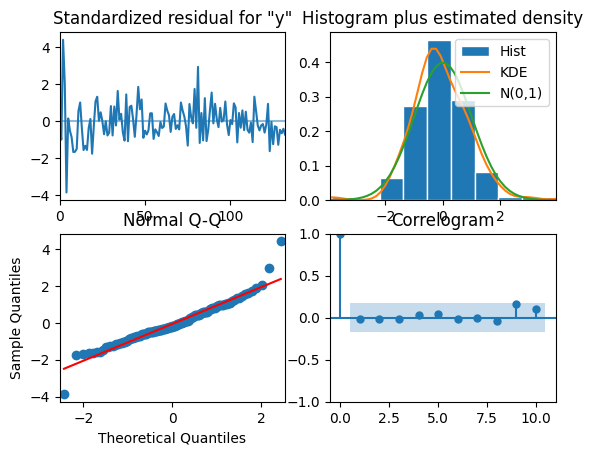

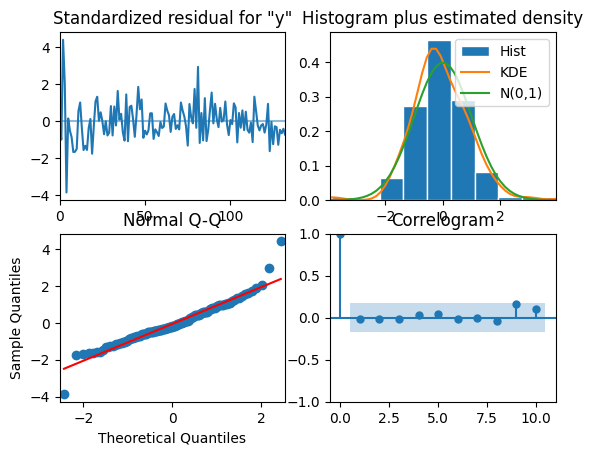

In [166]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

## Predict on the Test Set using this model and evaluate the model.

In [167]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(rtest))

In [168]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  62.466393  18.184057      26.826296      98.106490
1  76.203723  18.656083      39.638472     112.768975
2  72.992353  18.758666      36.226042     109.758663
3  75.290765  18.822361      38.399615     112.181915
4  74.389986  18.832676      37.478619     111.301353

In [169]:
rmse = mean_squared_error(rtest['Rose'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

20.562216880604083


In [170]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': rmse,'Test MAPE Rose':mape}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDf_SA = pd.concat([resultsR2M,temp_resultsDf])

resultsDf_SA

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)                 26.135542       56.709217
ARIMA(1,1,2)                 20.915405       56.709217
ARIMA(2,0,2)                 26.135542        0.567092
SARIMA(1,1,2)(2,0,2,6)       20.562217        0.567092

### SARIMA model for which the best parameters are selected at the ACF and the PACF plots

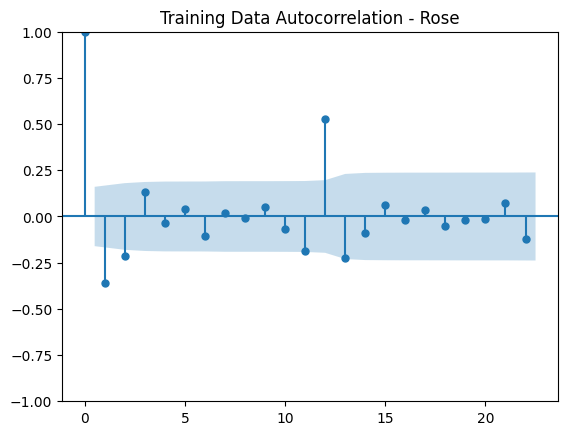

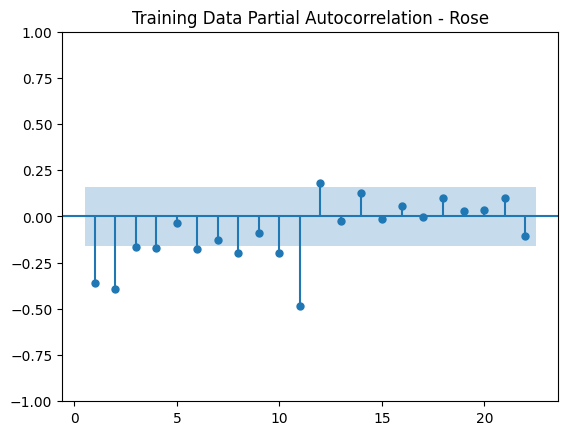

In [171]:
plot_acf(rtrain.diff(),title='Training Data Autocorrelation - Rose',missing='drop')
plot_pacf(rtrain.diff().dropna(),title='Training Data Partial Autocorrelation - Rose',zero=False,method='ywmle');

In [172]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(1,0,1),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                        
Dep. Variable:                                    Rose   No. Observations:                  149
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -526.849
Date:                                 Sun, 05 Jan 2025   AIC                           1065.698
Time:                                         16:22:46   BIC                           1082.571
Sample:                                     01-01-1980   HQIC                          1072.551
                                          - 05-01-1992                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1318      0.206      0.641      0.521      -0.271       0

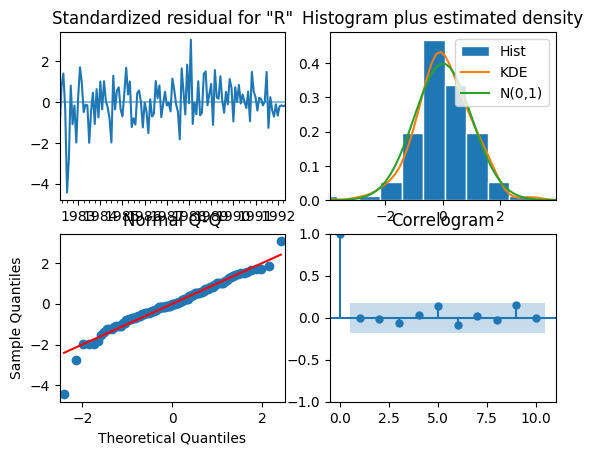

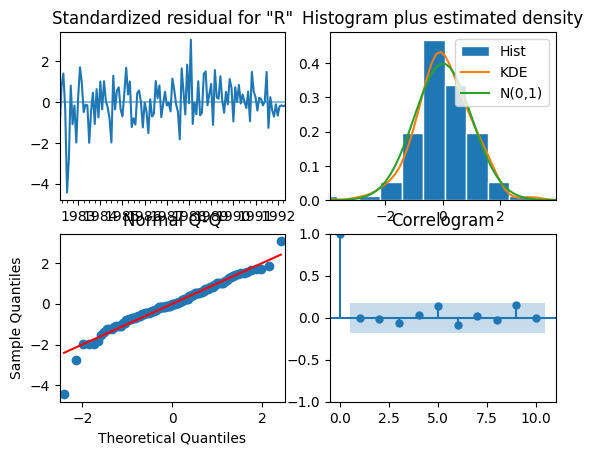

In [173]:
results_manual_SARIMA.plot_diagnostics()

### Predict on the Test by using this model and evaluate the model.

In [174]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             

rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 10.49735678448274 
MAPE: 0.1936481361246992


In [175]:
temp_resultsDf = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(1,0,1)(1,0,2,12)'])


resultsDfFR = pd.concat([resultsDf_SA,temp_resultsDf])

resultsDfFR

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)                  26.135542       56.709217
ARIMA(1,1,2)                  20.915405       56.709217
ARIMA(2,0,2)                  26.135542        0.567092
SARIMA(1,1,2)(2,0,2,6)        20.562217        0.567092
SARIMA(1,0,1)(1,0,2,12)       10.497357        0.193648

In [176]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(rtrain['Rose'],
                                order=(2,0,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  149
Model:             SARIMAX(2, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -518.274
Date:                            Sun, 05 Jan 2025   AIC                           1052.547
Time:                                    16:22:53   BIC                           1074.980
Sample:                                01-01-1980   HQIC                          1061.659
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2840      0.257      4.990      0.000       0.780       1.788
ar.L2         -0.2870      0.256   

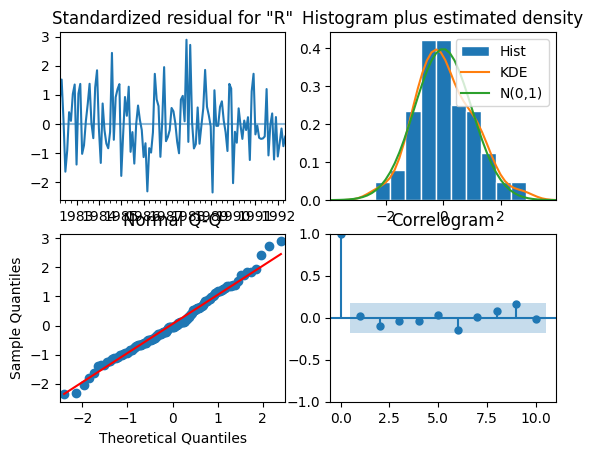

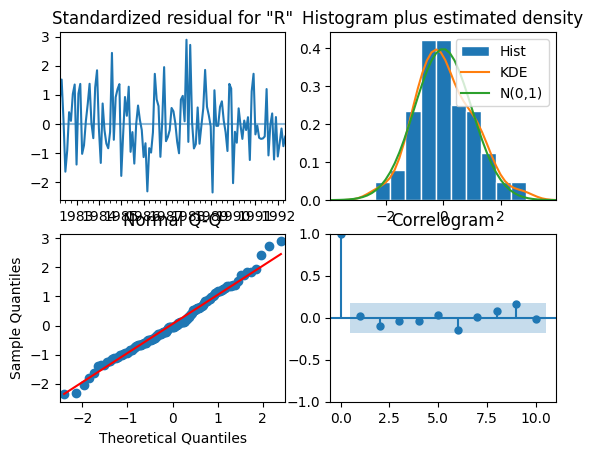

In [177]:
results_manual_SARIMA.plot_diagnostics()

### Predict on the Test by using this model and evaluate the model.

In [178]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(rtest))
                                                             

rmse = mean_squared_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(rtest['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 14.121719337310097 
MAPE: 0.29132336401827846


In [179]:
temp_resultsDf3 = pd.DataFrame({'Test RMSE Rose': [rmse],'Test MAPE Rose':mape}
                           ,index=['SARIMA(2,0,2)(1,0,2,12)'])


resultsDfFR3 = pd.concat([resultsDf_SA,temp_resultsDf3])

resultsDfFR3

Test RMSE Rose  Test MAPE Rose
ARIMA(2,0,2)                  26.135542       56.709217
ARIMA(1,1,2)                  20.915405       56.709217
ARIMA(2,0,2)                  26.135542        0.567092
SARIMA(1,1,2)(2,0,2,6)        20.562217        0.567092
SARIMA(2,0,2)(1,0,2,12)       14.121719        0.291323

In [180]:
resultsDfFinal = pd.concat([resultsDf11,resultsDfFR3], axis=0)
resultsDfFinal

Test RMSE Rose  \
RegressionOnTime                                         17.510241   
Simple Exponential Smoothing                             20.313631   
Double Exponential Smoothing                             14.623742   
Triple Exponential Smoothing (Additive Season)           13.877335   
SimpleAverageModel                                       52.239499   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Triple Exponential Smoothing (Multiplicative Se...        8.405441   
ARIMA(2,0,2)                                             26.135542   
ARIMA(1,1,2)                                             20.915405   
ARIMA(2,0,2)                                             26.135542   
SARIMA(1,1,2)(2,0,2,6)                                   20.562217   
SARIMA(2,0,2)(1,0,2,12)                                  14.121719   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1349.042457   
Simple Exponential Smoothing                                1329.402402   
Double Exponential Smoothing                                1340.452791   
Triple Exponential Smoothing (Additive Season)               304.247029   
SimpleAverageModel                                          1331.037637   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Triple Exponential Smoothing (Multiplicative Se...           318.695471   
ARIMA(2,0,2)                                                        NaN   
ARIMA(1,1,2)                                                        NaN   
ARIMA(2,0,2)                                                        NaN   
SARIMA(1,1,2)(2,0,2,6)                                              NaN   
SARIMA(2,0,2)(1,0,2,12)                                             NaN   

                                                    Test MAPE Rose  
RegressionOnTime                                               NaN  
Simple Exponential Smoothing                                   NaN  
Double Exponential Smoothing                                   NaN  
Triple Exponential Smoothing (Additive Season)                 NaN  
SimpleAverageModel                                             NaN  
2pointTrailingMovingAverage                                    NaN  
4pointTrailingMovingAverage                                    NaN  
6pointTrailingMovingAverage                                    NaN  
9pointTrailingMovingAverage                                    NaN  
Triple Exponential Smoothing (Multiplicative Se...             NaN  
ARIMA(2,0,2)                                             56.709217  
ARIMA(1,1,2)                                             56.709217  
ARIMA(2,0,2)                                              0.567092  
SARIMA(1,1,2)(2,0,2,6)                                    0.567092  
SARIMA(2,0,2)(1,0,2,12)                                   0.291323

## Building the most optimum model on the Full Data.

In [181]:
full_data_model = sm.tsa.statespace.SARIMAX(rose_data['Rose'],
                                order=(2,0,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 0, 2)x(1, 0, 2, 12)   Log Likelihood                -664.014
Date:                            Sun, 05 Jan 2025   AIC                           1344.028
Time:                                    16:22:59   BIC                           1368.630
Sample:                                01-01-1980   HQIC                          1354.018
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3233      0.196      6.736      0.000       0.938       1.708
ar.L2         -0.3268      0.196   

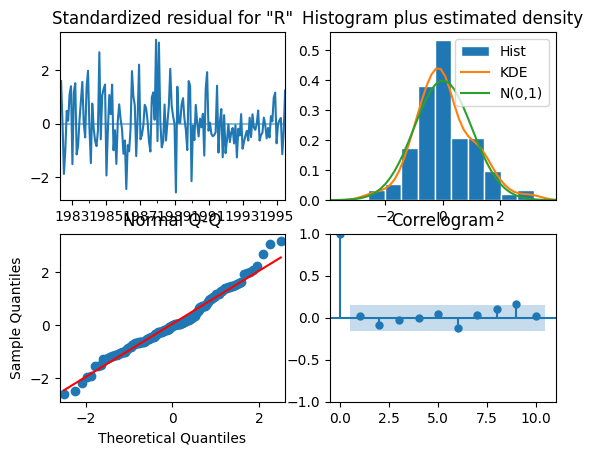

In [182]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [183]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [184]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  50.112544  15.010045      20.693396      79.531692
1995-09-01  49.426759  15.202513      19.630382      79.223136
1995-10-01  49.509797  15.223225      19.672823      79.346770
1995-11-01  57.808321  15.225277      27.967327      87.649315
1995-12-01  68.839497  15.225228      38.998598      98.680397

In [185]:
rmse = mean_squared_error(rose_data['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 31.43756133070178


In [186]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-12-01',end='1996-12-01', freq='M'))

<Axes: xlabel='YearMonth'>

Text(0.5, 0, 'Year-Months')

Text(0, 0.5, 'Rose')

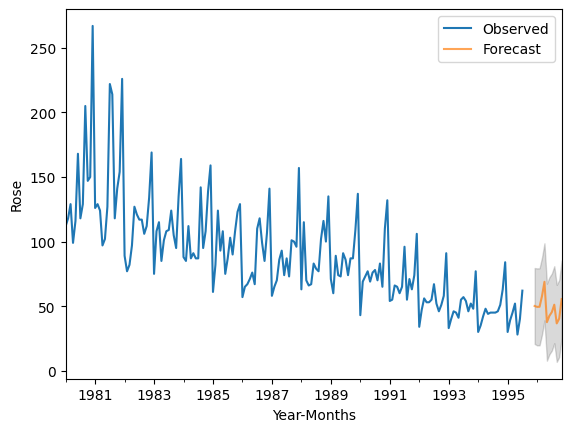

In [187]:
# plot the forecast along with the confidence band

axis = rose_data['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

# Sparkling wine dataset

## Check for Stationarity

The hypothesis in a simple form for the ADF test is:

𝐻0 : The Time Series has a unit root and is thus non-stationary.; 𝐻1 : The Time Series does not have a unit root and is thus stationary.

In [188]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

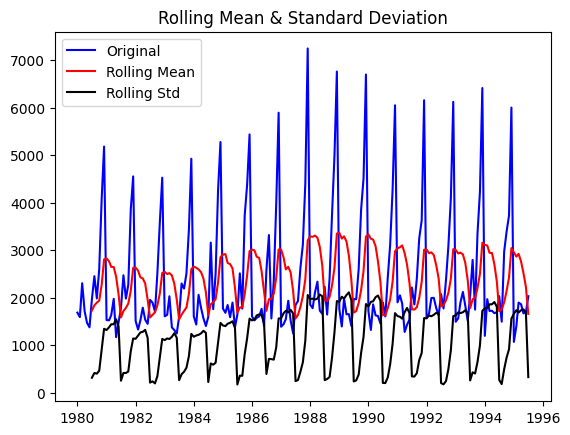

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [189]:
test_stationarity(sparkling_data['Sparkling'])

This p-value is greater than 0.05, which means you fail to reject the null hypothesis of non-stationarity. In simpler terms, this suggests that the data still has a unit root after the first differencing, indicating the series is still non-stationary.

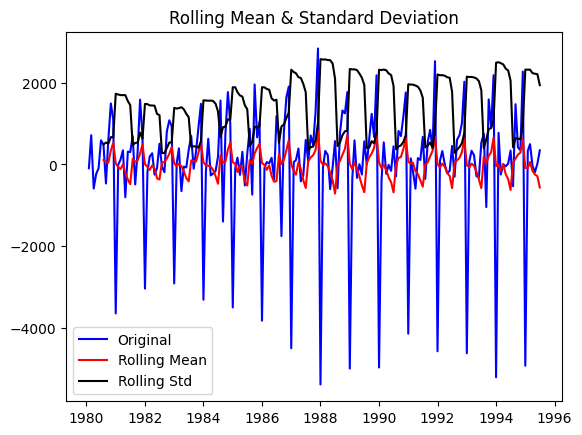

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [190]:
test_stationarity(sparkling_data['Sparkling'].diff().dropna())

We see that at α= 0.05 the Time Series is indeed stationary.

In [191]:
# Check for stationarity of the Training Data Time Series.

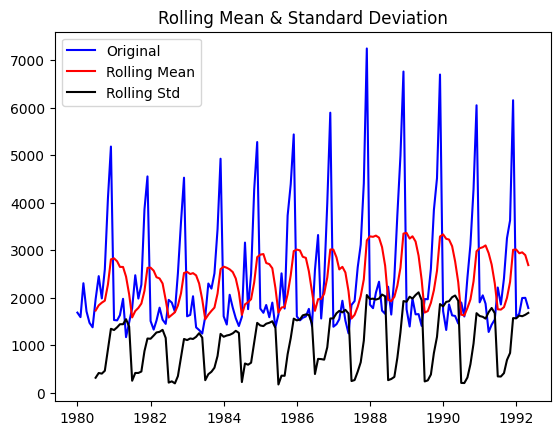

Results of Dickey-Fuller Test:
Test Statistic                  -1.301255
p-value                          0.628598
#Lags Used                      12.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64 



In [192]:
test_stationarity(strain['Sparkling'])

A p-value of 0.628598 is relatively high, suggesting that the null hypothesis is not rejected at commonly used significance levels (e.g., 0.05 or 0.01).

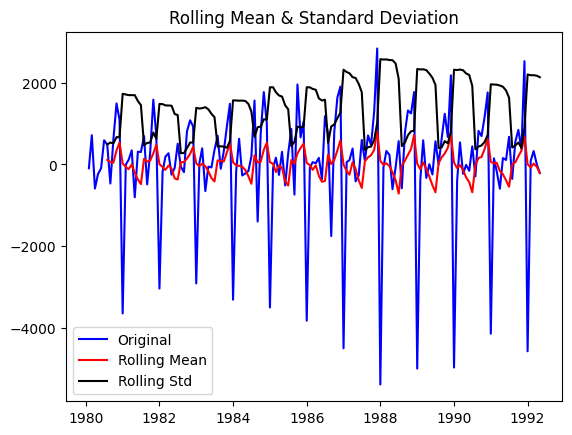

Results of Dickey-Fuller Test:
Test Statistic                -8.722027e+00
p-value                        3.365371e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.360000e+02
Critical Value (1%)           -3.479372e+00
Critical Value (5%)           -2.883037e+00
Critical Value (10%)          -2.578234e+00
dtype: float64 



In [193]:
test_stationarity(strain['Sparkling'].diff().dropna())

A p-value of 3.365371e-14 (essentially 0.00000000000003365371) is extremely small, indicating strong evidence against the null hypothesis.we reject null hypothesis.

In [194]:
strain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 149 entries, 1980-01-01 to 1992-05-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  149 non-null    int64
dtypes: int64(1)
memory usage: 2.3 KB


# Check the ACF and PACF of the training data.

In [195]:
strain_diff = strain.diff(periods=1).dropna()
strain_diff

Sparkling
YearMonth            
1980-02-01      -95.0
1980-03-01      713.0
1980-04-01     -592.0
1980-05-01     -241.0
1980-06-01      -94.0
...               ...
1992-01-01    -4576.0
1992-02-01       90.0
1992-03-01      326.0
1992-04-01        4.0
1992-05-01     -214.0

[148 rows x 1 columns]

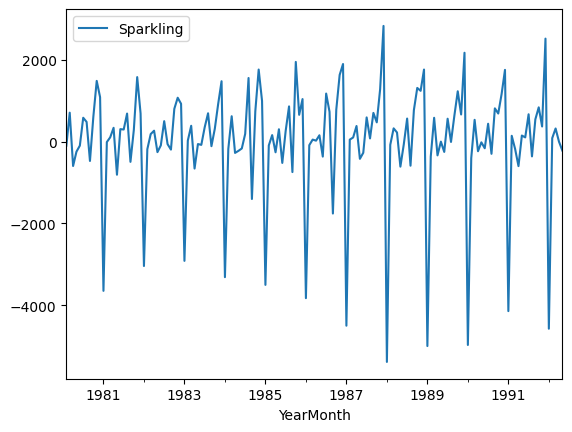

In [196]:
strain_diff.plot();

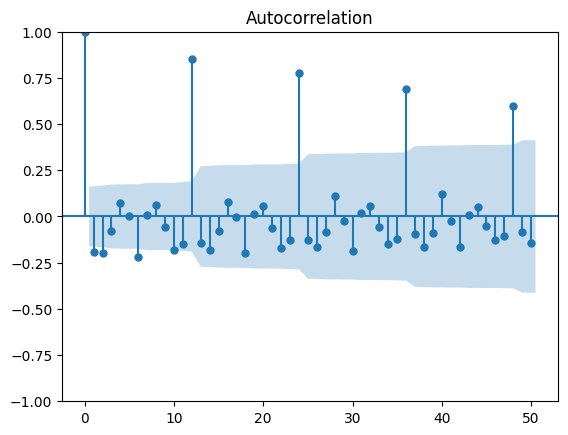

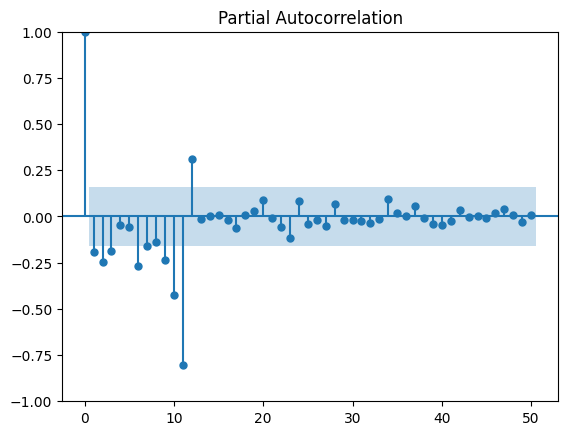

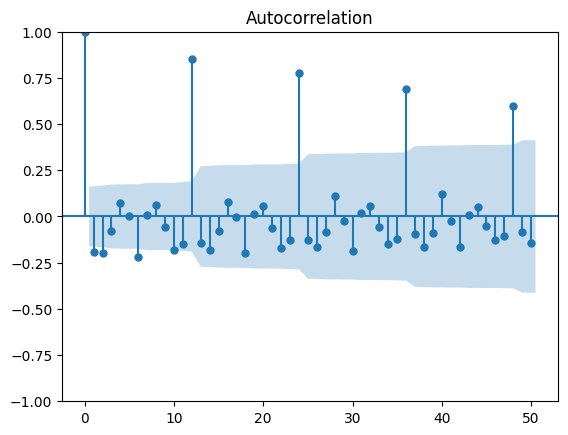

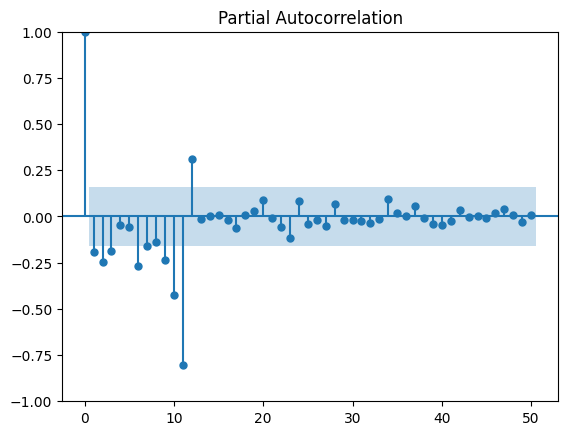

In [197]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
strain_diff = strain.diff(periods=1).dropna()
plot_acf(strain_diff.dropna(), lags=50,title='Autocorrelation')
plot_pacf(strain_diff.dropna(), lags=50, title='Partial Autocorrelation')
# Show the plots
plt.show()

### Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Acknowledging the seasonality in the data, it's indeed prudent to consider a SARIMA model. However, before proceeding, let's test whether an ARIMA or SARIMA model better fits the data by comparing their Akaike Information Criteria (AIC) values. We'll choose the model with the lowest AIC as the preferred option.

In [198]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [199]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [200]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Initialize the DataFrame

for param in pdq:
    # Fit the ARIMA model
    ARMA_model = ARIMA(strain['Sparkling'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARMA_model.aic))
    
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame([{'param': param, 'AIC': ARMA_model.aic}])
    
    # Use pd.concat() to add the new row
    ARMA_AIC = pd.concat([ARMA_AIC, temp_df], ignore_index=True)

ARIMA(0, 0, 0) - AIC:2559.26736429215
ARIMA(0, 0, 1) - AIC:2534.2746057404684
ARIMA(0, 0, 2) - AIC:2534.9699060983917
ARIMA(1, 0, 0) - AIC:2536.205348717019
ARIMA(1, 0, 1) - AIC:2535.4160345215964
ARIMA(1, 0, 2) - AIC:2536.7258642167426
ARIMA(2, 0, 0) - AIC:2534.2609809237924


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2, 0, 1) - AIC:2523.0118905993572
ARIMA(2, 0, 2) - AIC:2538.1426017798717


In [201]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
7  (2, 0, 1)  2523.011891
6  (2, 0, 0)  2534.260981
1  (0, 0, 1)  2534.274606
2  (0, 0, 2)  2534.969906
4  (1, 0, 1)  2535.416035
3  (1, 0, 0)  2536.205349
5  (1, 0, 2)  2536.725864
8  (2, 0, 2)  2538.142602
0  (0, 0, 0)  2559.267364

In [202]:
auto_ARIMA = ARIMA(strain['Sparkling'], order=(2,0,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -1256.506
Date:                Sun, 05 Jan 2025   AIC                           2523.012
Time:                        16:23:03   BIC                           2538.032
Sample:                    01-01-1980   HQIC                          2529.114
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2402.7403    104.787     22.930      0.000    2197.361    2608.120
ar.L1          1.2034      0.126      9.553      0.000       0.957       1.450
ar.L2         -0.4957      0.117     -4.234      0.0

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


## Predict on the Test Set using this model and evaluate the model.

In [203]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [204]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1320.945956968856


In [205]:
resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse], 'Test MAPE Sparkling': [mape]},
                           index=['ARIMA(2,0,1)'])

resultsDf

Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,0,1)          1320.945957             0.291323

## Build an Automated version of an <font color='blue'>ARIMA model</font> for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [206]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [207]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [208]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])  # Initialize the DataFrame

for param in pdq:
    # Fit the ARIMA model
    ARMA_model = ARIMA(strain['Sparkling'].values, order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param, ARMA_model.aic))
    
    # Create a temporary DataFrame for the new row
    temp_df = pd.DataFrame([{'param': param, 'AIC': ARMA_model.aic}])
    
    # Use pd.concat() to add the new row
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df], ignore_index=True)

ARIMA(0, 1, 0) - AIC:2569.144555918453
ARIMA(0, 1, 1) - AIC:2548.768349012923
ARIMA(0, 1, 2) - AIC:2523.5414888724645
ARIMA(1, 1, 0) - AIC:2565.740479972414
ARIMA(1, 1, 1) - AIC:2524.885266566849
ARIMA(1, 1, 2) - AIC:2524.334177298379
ARIMA(2, 1, 0) - AIC:2558.9143889710504
ARIMA(2, 1, 1) - AIC:2523.417016083449
ARIMA(2, 1, 2) - AIC:2503.890624622727


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [209]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2503.890625
7  (2, 1, 1)  2523.417016
2  (0, 1, 2)  2523.541489
5  (1, 1, 2)  2524.334177
4  (1, 1, 1)  2524.885267
1  (0, 1, 1)  2548.768349
6  (2, 1, 0)  2558.914389
3  (1, 1, 0)  2565.740480
0  (0, 1, 0)  2569.144556

In [210]:
auto_ARIMA = ARIMA(strain['Sparkling'], order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1246.945
Date:                Sun, 05 Jan 2025   AIC                           2503.891
Time:                        16:23:05   BIC                           2518.877
Sample:                    01-01-1980   HQIC                          2509.979
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2655      0.047     27.028      0.000       1.174       1.357
ar.L2         -0.5318      0.084     -6.320      0.000      -0.697      -0.367
ma.L1         -1.9286      0.059    -32.684      0.0

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Predict on the Test Set using this model and evaluate the model.

In [211]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(stest))

In [212]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1327.8129230410289


In [213]:
temp_resultsDf0 = pd.DataFrame({'Test RMSE Sparkling': [rmse], 'Test MAPE Sparkling': [mape]},
                           index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,0,1)          1320.945957             0.291323
ARIMA(2,1,2)          1327.812923             0.291323

# Manual ARIMA 

In [214]:
manual_ARIMA = ARIMA(strain['Sparkling'], order=(1,0,2))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  149
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1263.363
Date:                Sun, 05 Jan 2025   AIC                           2536.726
Time:                        16:23:05   BIC                           2551.746
Sample:                    01-01-1980   HQIC                          2542.828
                         - 05-01-1992                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2388.6106    276.531      8.638      0.000    1846.620    2930.601
ar.L1         -0.2493      0.837     -0.298      0.766      -1.890       1.391
ma.L1          0.7060      0.877      0.805      0.4

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\agnes\AppData\Roaming\Python\Python311\site-pa

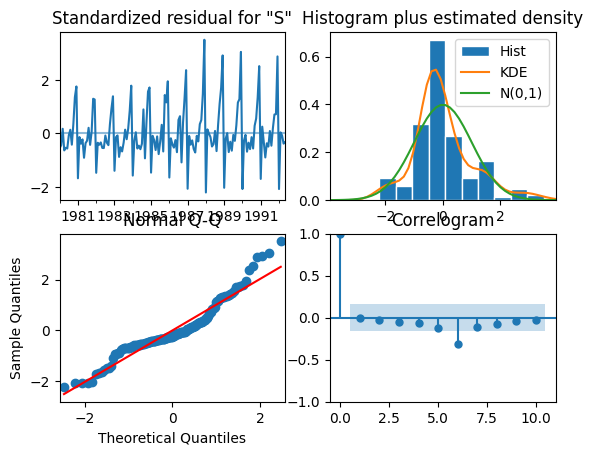

In [215]:
results_manual_ARIMA.plot_diagnostics();

### Predict on the Test by using this model and evaluate the model.

In [216]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(stest))

In [217]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Assuming rtest['Rose'] and predicted_auto_ARIMA are defined
# Calculate RMSE
rmse = mean_squared_error(stest['Sparkling'], predicted_auto_ARIMA, squared=False)

# Define a function for MAPE if not already available
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(stest['Sparkling'], predicted_auto_ARIMA)


In [218]:
# Create the results DataFrame
resultsDfSP = pd.DataFrame({'Test RMSE Sparkling': [rmse], 'Test MAPE Sparkling': [mape]}, 
                         index=['ARIMA(1,0,2)'])

print(resultsDfSP)



resultsS1 = pd.concat([resultsDf,resultsDfSP])
resultsS1


              Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(1,0,2)          1327.812923            41.651064


Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,0,1)          1320.945957             0.291323
ARIMA(2,1,2)          1327.812923             0.291323
ARIMA(1,0,2)          1327.812923            41.651064

## Build an Automated version of a <font color='blue'>SARIMA</font> model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

#### We see that there can be a seasonality of 6 as well as 12. But from the decompostion at the start we ascertained that visually it looks like the seasonality =6 and thus using the same 

### Setting the seasonality as 6  to estimate parametrs using auto SARIMA model.

In [219]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [220]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [221]:
import pandas as pd
import statsmodels.api as sm

# Initialize a list to store the results
SARIMA_results = []

for param in pdq:
    for param_seasonal in model_pdq:
        try:
            # Define and fit the SARIMA model
            SARIMA_model = sm.tsa.statespace.SARIMAX(
                strain['Sparkling'].values,
                order=param,
                seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results_SARIMA = SARIMA_model.fit(maxiter=1000)
            
            # Store the results as a dictionary
            SARIMA_results.append({
                'param': param,
                'seasonal_param': param_seasonal,
                'AIC': results_SARIMA.aic
            })
            
            # Print AIC value
            print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        except Exception as e:
            print(f"An error occurred for SARIMA{param}x{param_seasonal}: {e}")

# Convert results into a DataFrame
SARIMA_AIC = pd.DataFrame(SARIMA_results)

# Display the DataFrame
print(SARIMA_AIC)


SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2552.801193879039
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2453.406173183204
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:2245.2861231296856
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2464.7176570559714
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2391.043981132433
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:2200.891525877091
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:2097.5928434017287
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:2099.527910512112
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:2065.9959473219315
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2526.6677450030957
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2409.672362743858
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:2191.2710040900083
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2427.4731681504395
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2278.838442030854
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:2121.7467531762654
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:2047.7402852977866
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:2049.4710921629166
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1993.9266885308698
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:

In [222]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param seasonal_param          AIC
53  (1, 1, 2)   (2, 0, 2, 6)  1976.643203
26  (0, 1, 2)   (2, 0, 2, 6)  1976.665613
80  (2, 1, 2)   (2, 0, 2, 6)  1978.620695
71  (2, 1, 1)   (2, 0, 2, 6)  1993.024292
44  (1, 1, 1)   (2, 0, 2, 6)  1993.141850

In [223]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(strain['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  149
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -980.322
Date:                           Sun, 05 Jan 2025   AIC                           1976.643
Time:                                   16:23:39   BIC                           1999.766
Sample:                                        0   HQIC                          1986.039
                                           - 149                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5628      0.237     -2.371      0.018      -1.028      -0.098
ma.L1         -0.3236      0.190     -1.705

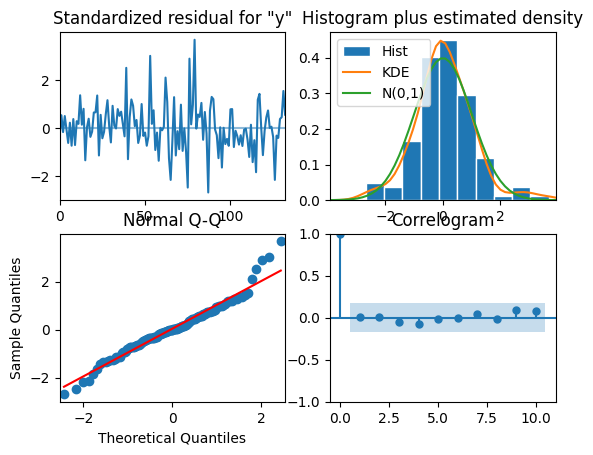

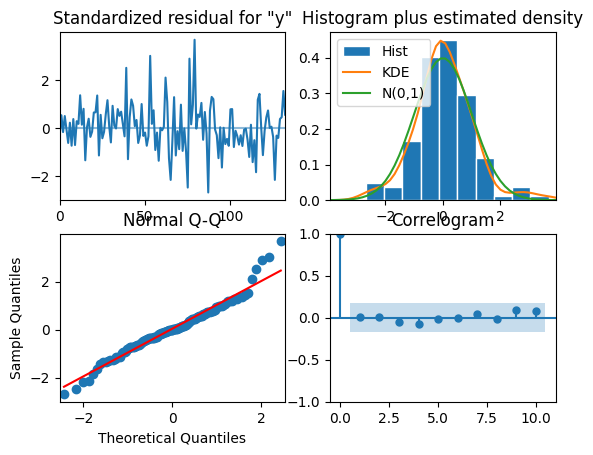

In [224]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

From the model diagnostics plot, we can see that all the individual diagnostics plots almost follow the theoretical numbers and thus we cannot develop any pattern from these plots.

## Predict on the Test Set using this model and evaluate the model.

In [225]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(stest))

In [226]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1384.219233  379.060492     641.274321    2127.164145
1  2066.314371  391.811953    1298.377055    2834.251687
2  1803.421649  391.903337    1035.305223    2571.538075
3  2399.724008  395.350492    1624.851282    3174.596733
4  3314.942012  395.760633    2539.265426    4090.618598

In [227]:
rmse = mean_squared_error(stest['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

316.99757907055607


In [228]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse],'Test MAPE Sparkling':mape}
                           ,index=['SARIMA(1,1,2)(2,0,2,6)'])


resultsDfS7 = pd.concat([resultsS1,temp_resultsDf])

resultsDfS7

Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,0,1)                    1320.945957             0.291323
ARIMA(2,1,2)                    1327.812923             0.291323
ARIMA(1,0,2)                    1327.812923            41.651064
SARIMA(1,1,2)(2,0,2,6)           316.997579            41.651064

### SARIMA model for which the best parameters are selected at the ACF and the PACF plots

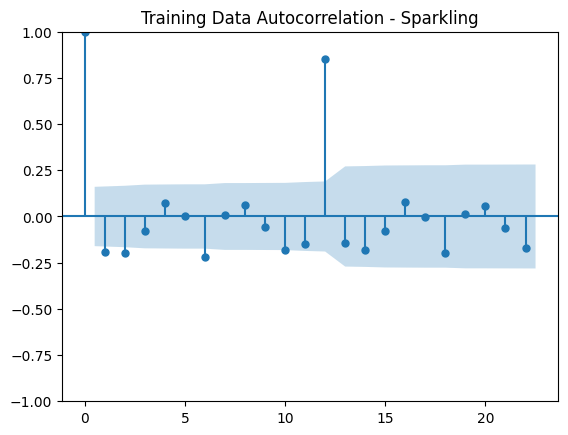

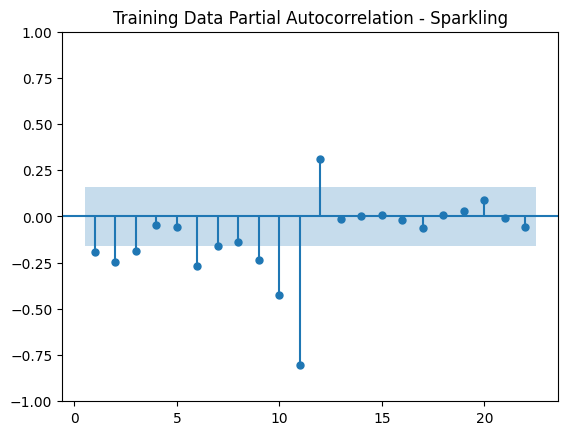

In [229]:
plot_acf(strain.diff(),title='Training Data Autocorrelation - Sparkling',missing='drop')
plot_pacf(strain.diff().dropna(),title='Training Data Partial Autocorrelation - Sparkling',zero=False,method='ywmle');


Given the significance level of 0.05 and a seasonal period of 12, we're setting the Auto-Regressive (AR) parameter 'p' and the Moving-Average (MA) parameter 'q' to 2, consistent with the ARIMA model.

For the seasonal component, we observe that the PACF plot cuts off after a significant lag, suggesting an Auto-Regressive Seasonal (SAR) parameter 'P' of 1. Similarly, the ACF plot cuts off after a significant lag, indicating a Moving-Average Seasonal (SMA) parameter 'Q' of 1.
D= 1 freq = 12

In [230]:
import statsmodels.api as sm

In [231]:
manual_SARIMA = sm.tsa.statespace.SARIMAX(strain['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())


C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  149
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood                -808.032
Date:                            Sun, 05 Jan 2025   AIC                           1630.065
Time:                                    16:23:43   BIC                           1648.904
Sample:                                01-01-1980   HQIC                          1637.705
                                     - 05-01-1992                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5246      0.228     -2.304      0.021      -0.971      -0.078
ma.L1         -0.2049      0.187   

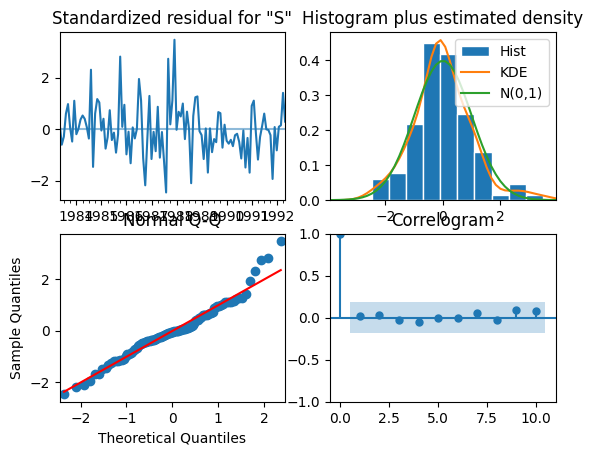

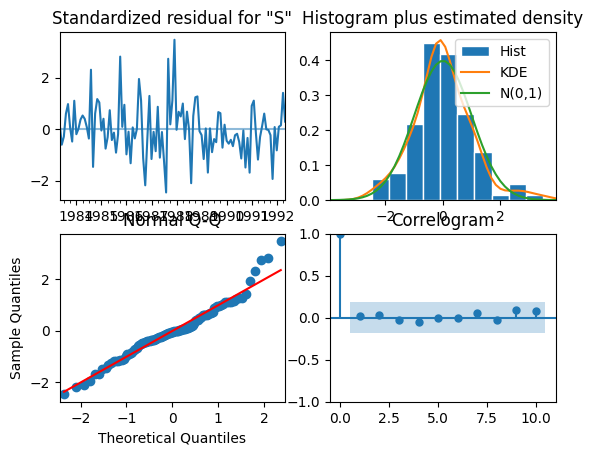

In [232]:
results_manual_SARIMA.plot_diagnostics()

### Predict on the Test by using this model and evaluate the model.

In [233]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(stest))

In [234]:
rmse = mean_squared_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(stest['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)


RMSE: 294.1666271095524 
MAPE: 10.922985010210269


In [235]:
temp_resultsDf = pd.DataFrame({'Test RMSE Sparkling': [rmse],'Test MAPE Sparkling':mape}
                           ,index=['SARIMA(1,1,2)(1,1,2,12)'])


In [236]:
resultsDfMSS = pd.concat([resultsDfS7,temp_resultsDf])

resultsDfMSS


Test RMSE Sparkling  Test MAPE Sparkling
ARIMA(2,0,1)                     1320.945957             0.291323
ARIMA(2,1,2)                     1327.812923             0.291323
ARIMA(1,0,2)                     1327.812923            41.651064
SARIMA(1,1,2)(2,0,2,6)            316.997579            41.651064
SARIMA(1,1,2)(1,1,2,12)           294.166627            10.922985

In [237]:
resultsDfFinal = pd.concat([resultsDf11,resultsDfMSS], axis=0)
resultsDfFinal

Test RMSE Rose  \
RegressionOnTime                                         17.510241   
Simple Exponential Smoothing                             20.313631   
Double Exponential Smoothing                             14.623742   
Triple Exponential Smoothing (Additive Season)           13.877335   
SimpleAverageModel                                       52.239499   
2pointTrailingMovingAverage                              11.529409   
4pointTrailingMovingAverage                              14.455221   
6pointTrailingMovingAverage                              14.572009   
9pointTrailingMovingAverage                              14.731209   
Triple Exponential Smoothing (Multiplicative Se...        8.405441   
ARIMA(2,0,1)                                                   NaN   
ARIMA(2,1,2)                                                   NaN   
ARIMA(1,0,2)                                                   NaN   
SARIMA(1,1,2)(2,0,2,6)                                         NaN   
SARIMA(1,1,2)(1,1,2,12)                                        NaN   

                                                    Test RMSE Sparkling  \
RegressionOnTime                                            1349.042457   
Simple Exponential Smoothing                                1329.402402   
Double Exponential Smoothing                                1340.452791   
Triple Exponential Smoothing (Additive Season)               304.247029   
SimpleAverageModel                                          1331.037637   
2pointTrailingMovingAverage                                  813.400684   
4pointTrailingMovingAverage                                 1156.589694   
6pointTrailingMovingAverage                                 1283.927428   
9pointTrailingMovingAverage                                 1346.278315   
Triple Exponential Smoothing (Multiplicative Se...           318.695471   
ARIMA(2,0,1)                                                1320.945957   
ARIMA(2,1,2)                                                1327.812923   
ARIMA(1,0,2)                                                1327.812923   
SARIMA(1,1,2)(2,0,2,6)                                       316.997579   
SARIMA(1,1,2)(1,1,2,12)                                      294.166627   

                                                    Test MAPE Sparkling  
RegressionOnTime                                                    NaN  
Simple Exponential Smoothing                                        NaN  
Double Exponential Smoothing                                        NaN  
Triple Exponential Smoothing (Additive Season)                      NaN  
SimpleAverageModel                                                  NaN  
2pointTrailingMovingAverage                                         NaN  
4pointTrailingMovingAverage                                         NaN  
6pointTrailingMovingAverage                                         NaN  
9pointTrailingMovingAverage                                         NaN  
Triple Exponential Smoothing (Multiplicative Se...                  NaN  
ARIMA(2,0,1)                                                   0.291323  
ARIMA(2,1,2)                                                   0.291323  
ARIMA(1,0,2)                                                  41.651064  
SARIMA(1,1,2)(2,0,2,6)                                        41.651064  
SARIMA(1,1,2)(1,1,2,12)                                       10.922985

## Building the most optimum model on the Full Data.

In [238]:
full_data_model = sm.tsa.statespace.SARIMAX(sparkling_data['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\agnes\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -1086.479
Date:                            Sun, 05 Jan 2025   AIC                           2186.959
Time:                                    16:23:47   BIC                           2207.892
Sample:                                01-01-1980   HQIC                          2195.464
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5964      0.337     -1.772      0.076      -1.256       0.063
ma.L1         -0.2476      0.307   

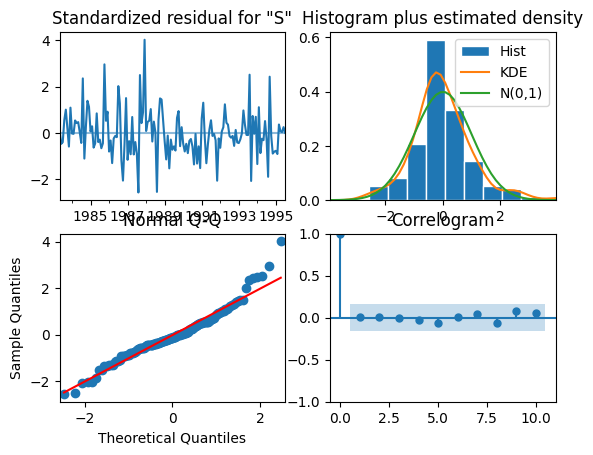

In [239]:
results_full_data_model.plot_diagnostics();

## Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [240]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [241]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1876.060470  389.457895    1112.737023    2639.383917
1995-09-01  2478.217287  394.168593    1705.661040    3250.773534
1995-10-01  3293.555600  394.318087    2520.706350    4066.404849
1995-11-01  3933.325253  395.602487    3157.958626    4708.691879
1995-12-01  6132.783697  395.653821    5357.316457    6908.250936

In [242]:
rmse = mean_squared_error(sparkling_data['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 554.1755396135478


In [243]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-12-01',end='1996-12-01', freq='M'))

<Axes: xlabel='YearMonth'>

Text(0.5, 0, 'Year-Months')

Text(0, 0.5, 'Sparkling')

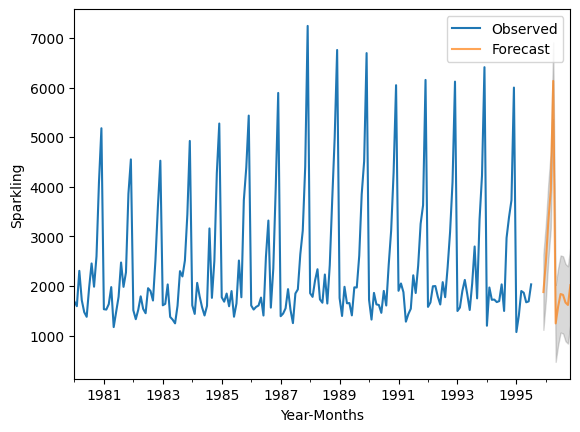

In [244]:
# plot the forecast along with the confidence band

axis = sparkling_data['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()